In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.model_selection import KFold

In [2]:
#changing the display settings
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [3]:
data_path = 'house_price_data.csv'
data = pd.read_csv(data_path)
#top 5 rowsof dataframe
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#rows,columns of dataframe
data.shape

(1460, 81)

### Data Cleaning

In [5]:
#function for returning columns and their null percentage. 
#This will only return columns which have more than 0 percent null values
def getNullColumns(dataFrame):
    return round(dataFrame.isnull().sum()[dataFrame.isnull().sum() > 0]*100/len(dataFrame.index), 2)

In [6]:
getNullColumns(data)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

The columns _Alley, FireplaceQU, PoolQC, Fence, and MiscFeature_ has more null values. But from data description we can see that NA means the fecility is not available, but pandas recognised NA as null value. Even though _Alley, PoolQC, Fence, and MiscFeature_ has meaningfull missing values, but over 80% have single value. So, we could remove these columns.

In [7]:
null_cols = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
data.drop(null_cols, axis=1, inplace=True)
getNullColumns(data)

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64

_FireplaceQu_, and the Basement related Columns _BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2_ are also having NA values, which means NO basement was there. So, converting these values also from __NA__ to __None__.

Also from the data description we can see that when there is no garage, values is encoded in file as NA, but pandas recognised it as null, so we will make _GarageType, GarageFinish, GarageQual, GarageCond_  __NA__ values to __None__.

In [8]:
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
        'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
data[cols] = data[cols].fillna('None')

In [9]:
getNullColumns(data)

LotFrontage    17.74
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
GarageYrBlt     5.55
dtype: float64

Let's look at the GarageYrBlt column. Just to get to know why this column has null values let's see all the garage related column values when GarageYrBlt is null.

In [10]:
data[data['GarageYrBlt'].isnull()][['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']]

,GarageType,GarageFinish,GarageQual,GarageCond
39,None,None,None,None
48,None,None,None,None
78,None,None,None,None
88,None,None,None,None
89,None,None,None,None
99,None,None,None,None
108,None,None,None,None
125,None,None,None,None
127,None,None,None,None
140,None,None,None,None


As we can see from above table, GarageYrBlt is null, when these is no garage. So, will fill the null values with 0.

In [11]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)
getNullColumns(data)

LotFrontage    17.74
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

As _Electrical, MasVnrType, MasVnrArea_ columns are having very low percentage of null values and could not find whether it is a meaning full missing or error in data, we are going to remove  them.

In [12]:
data = data[~data['MasVnrType'].isnull()]
data = data[~data['Electrical'].isnull()]
getNullColumns(data)

LotFrontage    17.71
dtype: float64

Let's impute the LotFrontage column with median value.

In [13]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
getNullColumns(data)

Series([], dtype: float64)

In [14]:
data['Id'].nunique()

1451

The Id column is unique accross the table, so we can remove it.

In [15]:
data.drop('Id', axis=1, inplace=True)

We finally come to a point where there are no missing vallues in data. and lets see the size of data frame.

In [16]:
data.shape

(1451, 76)

There is not much change in data size. Only 1% of data has been removed.

In [17]:
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object


All the columns are having corrrect data types assigned to them.

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1451.0,56.933150,42.350366,20.0,20.0,50.0,70.0,190.0
LotFrontage,1451.0,69.845624,22.044429,21.0,60.0,69.0,79.0,313.0
LotArea,1451.0,10507.808408,9992.987081,1300.0,7537.5,9477.0,11600.0,215245.0
OverallQual,1451.0,6.093728,1.381467,1.0,5.0,6.0,7.0,10.0
OverallCond,1451.0,5.579600,1.113415,1.0,5.0,5.0,6.0,9.0
YearBuilt,1451.0,1971.092350,30.190266,1872.0,1954.0,1972.0,2000.0,2010.0
YearRemodAdd,1451.0,1984.760165,20.651334,1950.0,1966.0,1993.0,2004.0,2010.0
MasVnrArea,1451.0,103.756720,181.108150,0.0,0.0,0.0,166.0,1600.0
BsmtFinSF1,1451.0,442.274983,455.369276,0.0,0.0,381.0,707.0,5644.0
BsmtFinSF2,1451.0,46.838043,161.777324,0.0,0.0,0.0,0.0,1474.0


### Derived Features

We have 4 columns i.e,. _YearBuilt, YearRemodAdd, GarageYrBlt, YrSold_  which has values as year.

In [19]:
data[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [20]:
data[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,1451.000000,1451.000000,1451.000000,1451.000000
mean,1971.092350,1984.760165,1867.914542,2007.815300
std,30.190266,20.651334,454.981043,1.329376
min,1872.000000,1950.000000,0.000000,2006.000000
25%,1954.000000,1966.000000,1958.000000,2007.000000
50%,1972.000000,1993.000000,1977.000000,2008.000000
75%,2000.000000,2004.000000,2001.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


We will calculate the number of years from current year and use this derived features instead of original one. While cleaning the data set we have imputed _GarageYrBlt_ with 0 as there was no garage. So, we will let the value be 0 for the derived variable also.

In [21]:
current_year = datetime.now().year
data['AgeBuilt'] = data['YearBuilt'].apply(lambda v:current_year-v)
data['AgeRemodAdd'] = data['YearRemodAdd'].apply(lambda v:current_year-v)
data['AgeSold'] = data['YrSold'].apply(lambda v:current_year-v)
data['AgeGarageBlt'] = data['GarageYrBlt'].apply(lambda v:current_year-v if v != 0 else v)

In [22]:
#removing original columns
data.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis=1, inplace=True)

### Univariate Analysis

In [23]:
#function to plot continuous variable with histogram and barplot
def plotContinuous(df, cols, showStats = True):
    for col in cols:
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        sns.distplot(df[col])
        plt.subplot(1,2,2)
        sns.boxplot(df[col])
        plt.suptitle('Distribution of '+col)
        plt.show()
        if showStats:
            print("Skew    ",df[col].skew())
            print(df[col].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

In [24]:
#plotting categorical data
def plotCategorical(df, cols):
    for i in range(0, len(cols)):
        if i%2 == 0:
            plt.figure(figsize=(20,4))
            plt.subplot(1,2,1)
        else:
            plt.subplot(1,2,2)
        sns.countplot(df[cols[i]], order = df[cols[i]].value_counts().index)
        plt.title('Distribution of '+cols[i])
        #rotate x-axis values when it has more charecters.
        if len([val for val in list(df[cols[i]].unique()) if type(val) == str and len(val) > 4 ]) > 2:
            plt.xticks(rotation=90)
        i = i+1

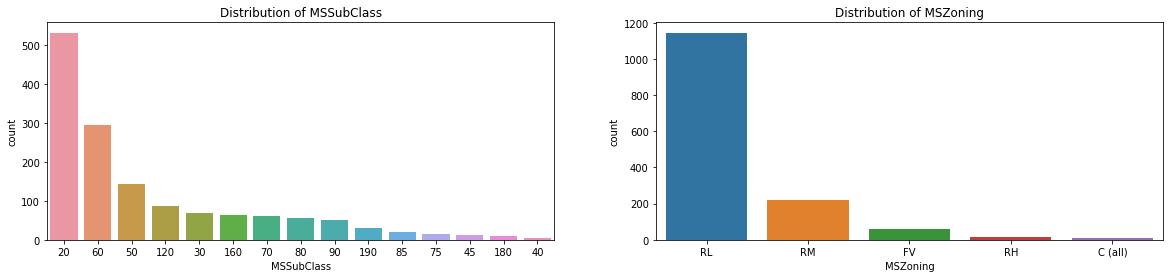

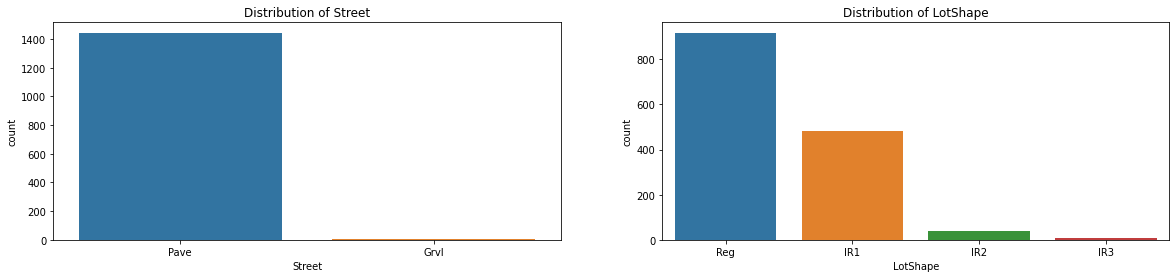

In [25]:
plotCategorical(data, ['MSSubClass', 'MSZoning', 'Street', 'LotShape'])

**Observations:**
1. Most of the houses are under 20, 60 class which is nothing but 1-STORY 1946 & NEWER ALL STYLES and 2-STORY 1946 & NEWER respectively.
2. Most Houses are in RL - Residential Low Density zone. Commericial houses are least among all.
3. Almost 99% houses have Pave streat.
4. About 90% houses are Regular and slightly regular in shape of property.

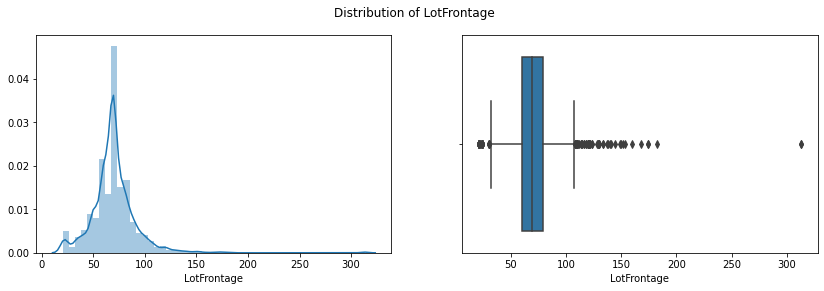

Skew     2.4194663138886234
count    1451.000000
mean       69.845624
std        22.044429
min        21.000000
5%         36.000000
25%        60.000000
50%        69.000000
75%        79.000000
95%       104.000000
99%       137.500000
max       313.000000
Name: LotFrontage, dtype: float64


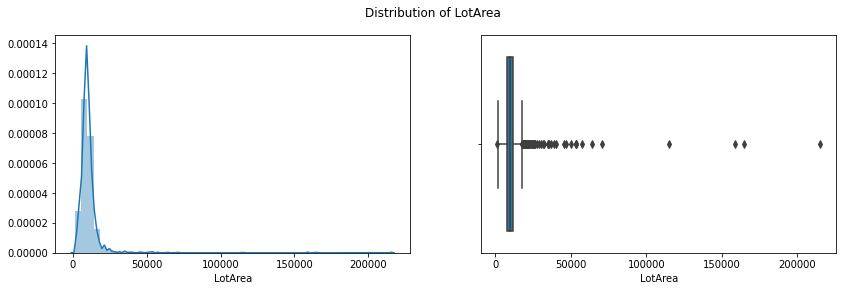

Skew     12.235741743336332
count      1451.000000
mean      10507.808408
std        9992.987081
min        1300.000000
5%         3273.000000
25%        7537.500000
50%        9477.000000
75%       11600.000000
95%       17308.500000
99%       37802.000000
max      215245.000000
Name: LotArea, dtype: float64


In [26]:
plotContinuous(data, ['LotFrontage', 'LotArea'])

**Observations :**  
1. Both LotFrontage and LotArea are having right skewed  distributions. And Skew of LotArea is more compared to the LotFrontage
2. There are outliers for both variable and there is sudden jump in values after 95% values.

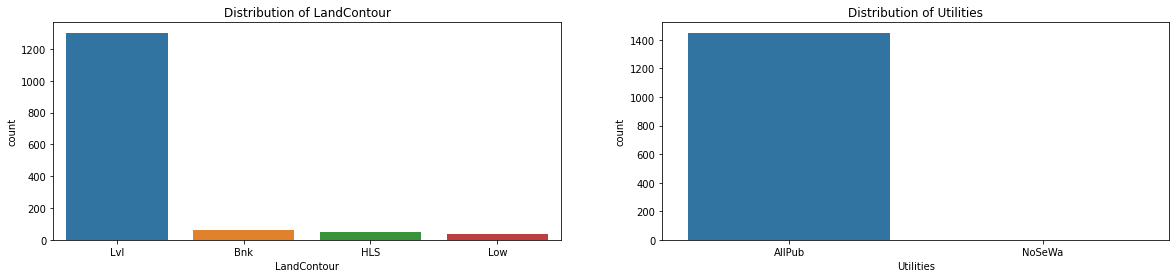

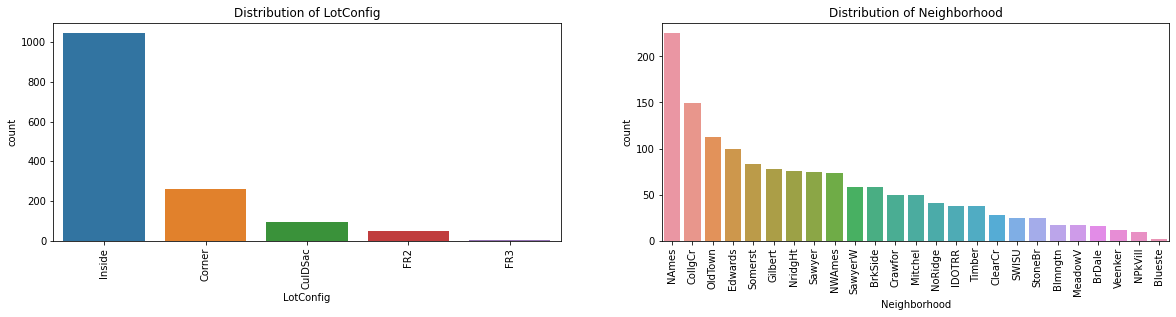

In [27]:
plotCategorical(data, ['LandContour', 'Utilities', 'LotConfig', 'Neighborhood'])

**Observations**:
1. The Land contour is flat for most of the houses.
2. All the 1450 houses are hving all Utilities, only 1 house is having Electricity and Gas only.
3. Most of the properties are inside followed by Corner Properties.
4. Most houses sold near Northwest Ames, and least sold in Bluestem.

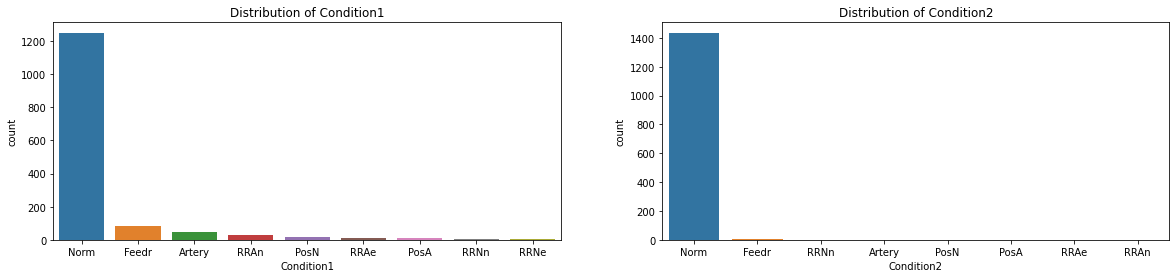

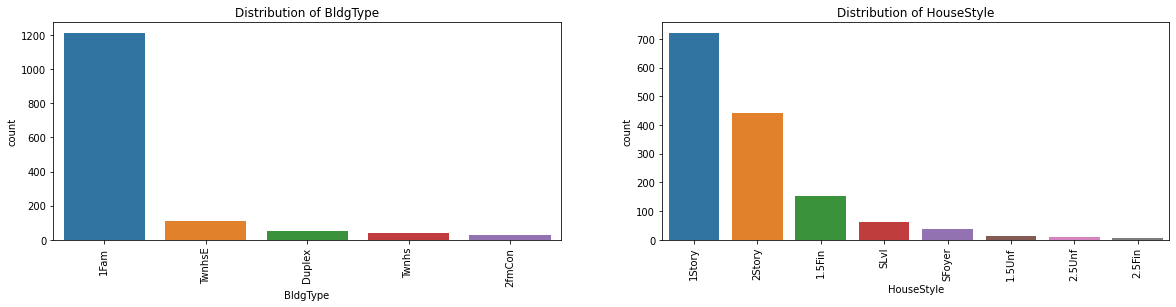

In [28]:
plotCategorical(data, ['Condition1', 'Condition2', 'BldgType', 'HouseStyle'])

**Observations**:
1. Houses with 2 proximity conditions are very very less. Most of the houses are Normal.
2. Almost 80% of houses are Single Family detached houses.
3. Single Story houses are sold more, followed by Two story houses.

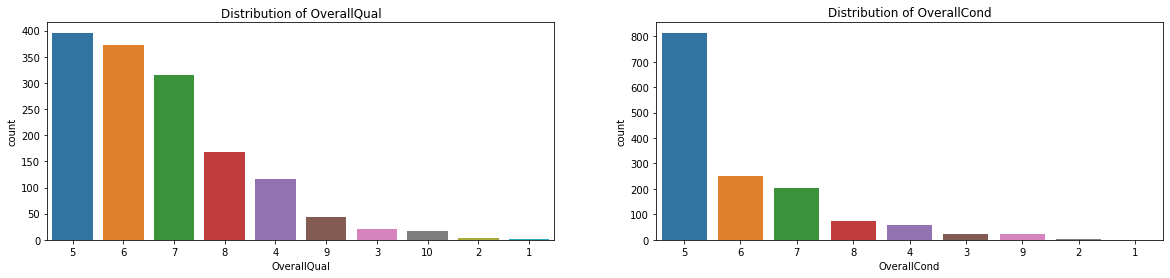

In [29]:
plotCategorical(data, ['OverallQual', 'OverallCond'])

**Observations**:
1. Most above 90% of houses are 5 and above Quality and Condition. There are very few houses that are having extream high quality(10) and low quality(1).

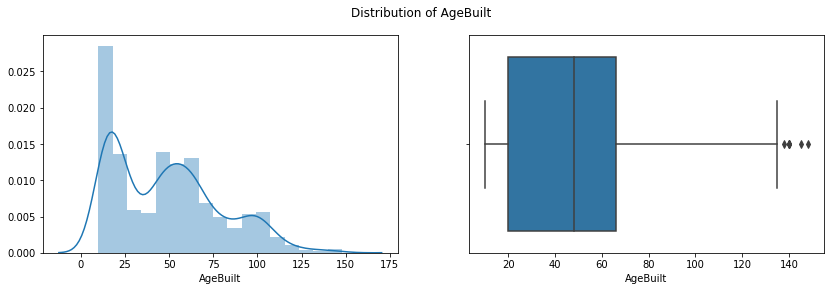

Skew     0.6082207533833714
count    1451.000000
mean       48.907650
std        30.190266
min        10.000000
5%         13.000000
25%        20.000000
50%        48.000000
75%        66.000000
95%       104.000000
99%       121.000000
max       148.000000
Name: AgeBuilt, dtype: float64


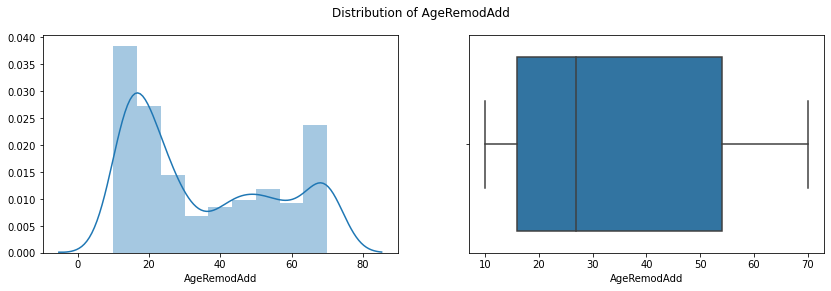

Skew     0.49633890344420345
count    1451.000000
mean       35.239835
std        20.651334
min        10.000000
5%         13.000000
25%        16.000000
50%        27.000000
75%        54.000000
95%        70.000000
99%        70.000000
max        70.000000
Name: AgeRemodAdd, dtype: float64


In [30]:
plotContinuous(data, ['AgeBuilt', 'AgeRemodAdd'])

**Observations**:
1. We can see about 5% of houses are having more than 100 years of age.
2. The average age of house is 48. 
3. Average number years from the modification year is 35.
4. From the data dictionary we have see that remodel year is same as build year is no remodeling is done. In the Above two plots we can see houses are below 25 years age has same kind of distribution, we could say that people have not remodeled if their house is less than 25 years age.

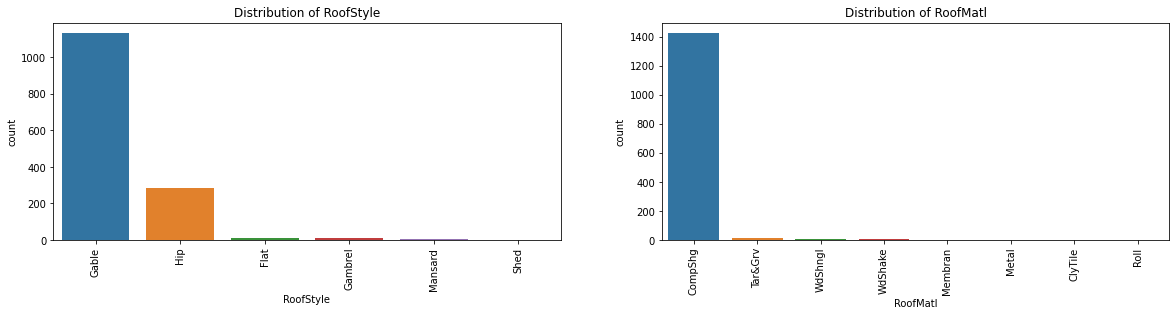

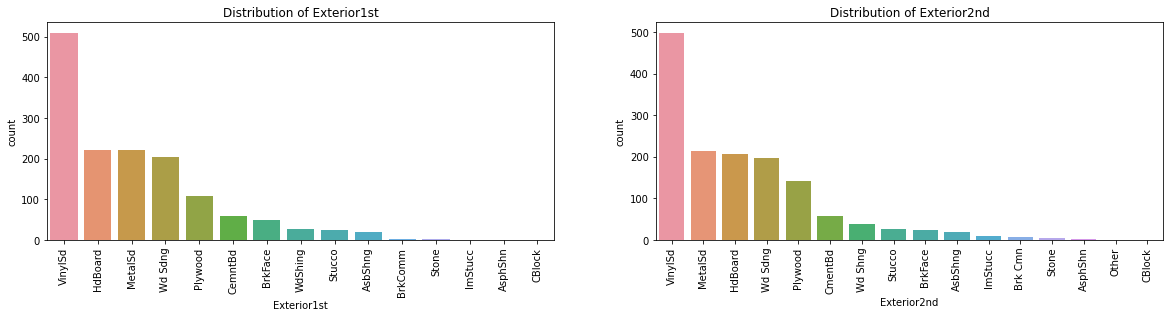

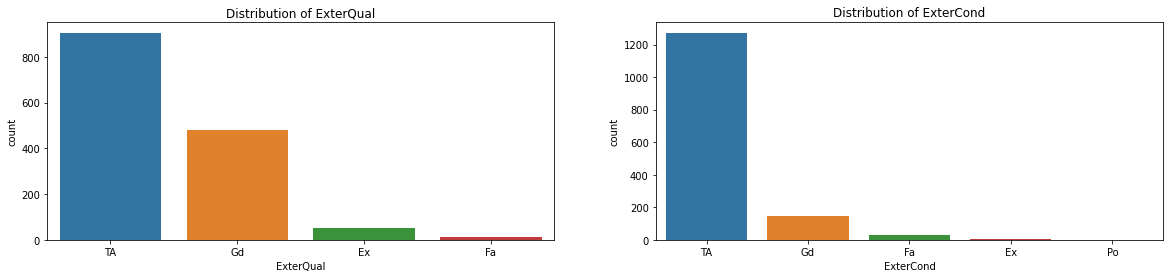

In [31]:
plotCategorical(data, ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond'])

**Observations:**
1. While most houses have Gable roof style, Standard Shingle meterial used most used on the roof.
2. Vinyl Siding is most used Exterial Meterial followed by Hard board, Metal Siding and others.
3. Both exterior quality and condition of most of the houses is Average.

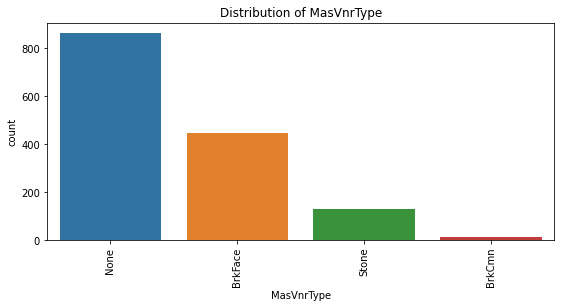

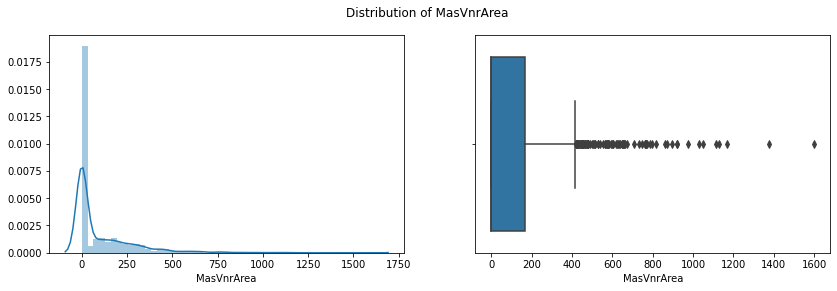

Skew     2.6680164807560303
count    1451.00000
mean      103.75672
std       181.10815
min         0.00000
5%          0.00000
25%         0.00000
50%         0.00000
75%       166.00000
95%       456.00000
99%       792.00000
max      1600.00000
Name: MasVnrArea, dtype: float64


In [32]:
plotCategorical(data, ['MasVnrType'])
plotContinuous(data, ['MasVnrArea'])

**Observations**:
1. Over 50% houses dont have any type of Masonry veneer, thus the area also resulted as 0.
2. In the other 50% most houses have Brick face masonry veneer.

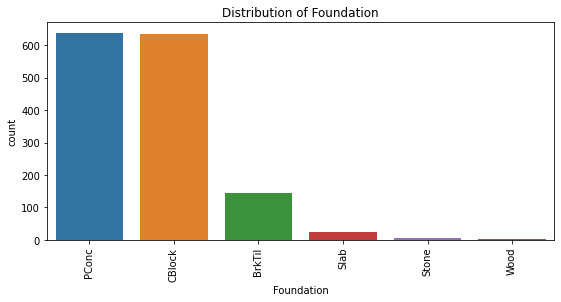

In [33]:
plotCategorical(data, ['Foundation'])

**Observations**:  
While most of the houses are having foundation with Poured concrete and Cinder Block, very few houses have wood based foundation.

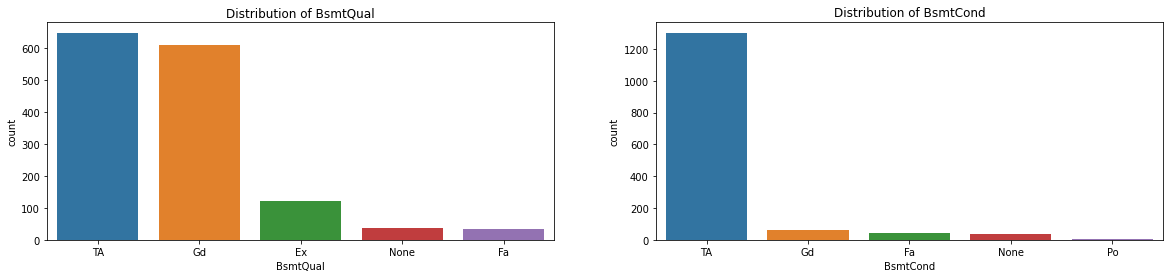

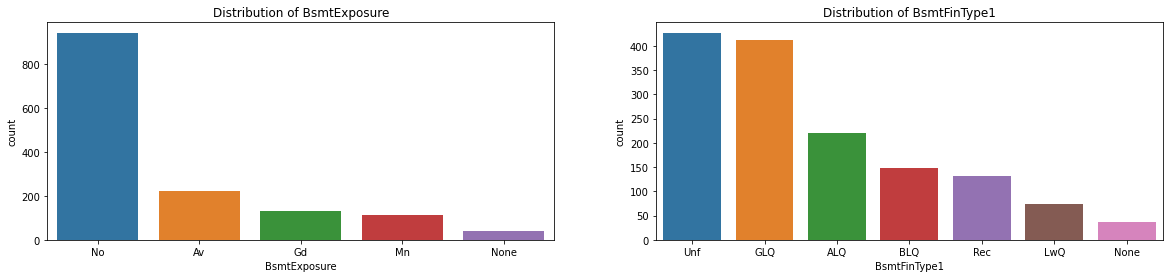

In [34]:
plotCategorical(data, ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1'])

**Observations**:
1. Almost 95% of houses have average and above(Gd, Ex) quality.
2. Where as 90% of the basement condition is average.
3. Most of the basements have no exposure.
4. The Rating od Basement finishing is innteresting. While Unfinished basements are highest among all. The next in highest follows the pattern Good, average, Below averag.

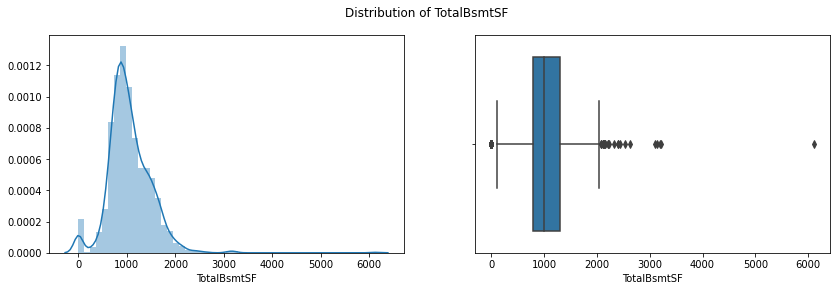

Skew     1.5355663165360056
count    1451.000000
mean     1056.310131
std       437.914609
min         0.000000
5%        520.000000
25%       795.000000
50%       991.000000
75%      1297.500000
95%      1749.000000
99%      2155.500000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


In [35]:
plotContinuous(data, ['TotalBsmtSF'])

**Observations**:  
1. The distribution looks like positively skewed distribution, as there are more outliers on right side.
2. Most of the values are concentrated around 1000, and also there are houses with very high basement area.

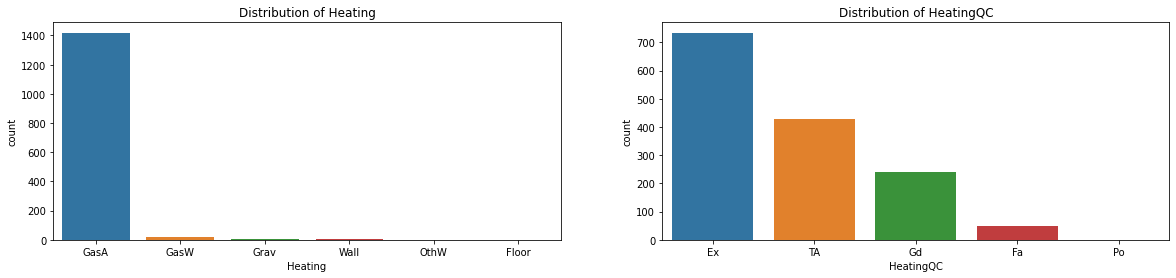

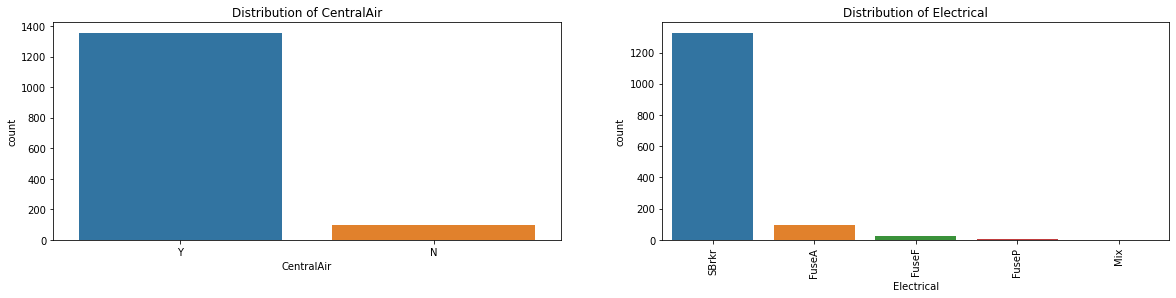

In [36]:
plotCategorical(data, ['Heating', 'HeatingQC', 'CentralAir', 'Electrical'])

**Observations**:
1. Heating in the house is mostly Gas forced warm air furnace type in 99% of houses.
2. While the 50% of houes have Excellent Quality of heating, followed by Average and Good.
3. 90% of houses are equiped with central Air conditioning.
4. Also 90% of houses are equiped with Standard Circuit Breakers & Romex.

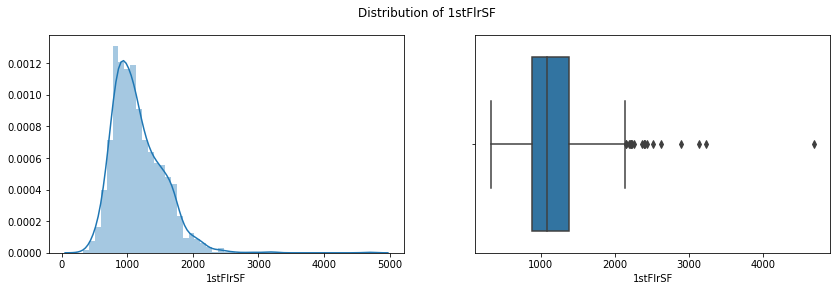

Skew     1.373141509130297
count    1451.000000
mean     1161.551344
std       385.002532
min       334.000000
5%        672.500000
25%       882.000000
50%      1086.000000
75%      1391.000000
95%      1827.000000
99%      2212.000000
max      4692.000000
Name: 1stFlrSF, dtype: float64


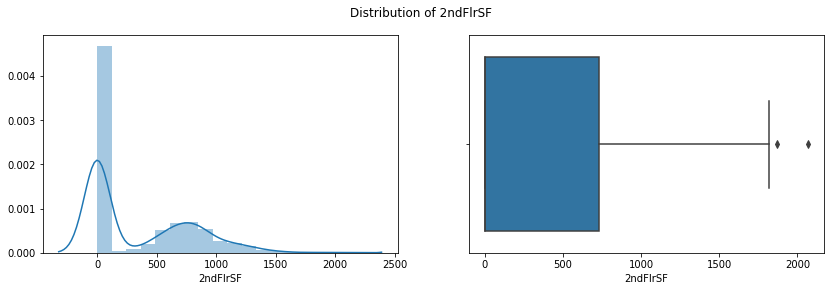

Skew     0.8157663449459674
count    1451.000000
mean      346.742247
std       436.453277
min         0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%       728.000000
95%      1141.500000
99%      1420.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


In [37]:
plotContinuous(data, ['1stFlrSF', '2ndFlrSF'])

**Observations**:
1. The Area of 1st floor distribution is centered around 1000sqft, and there are houses with extream high values.
2. The 2nd floor area distribution is having about 50% 0 values, if we can remember the house style has 50% of single story houses, which imply they will have 0 2nd floor area.

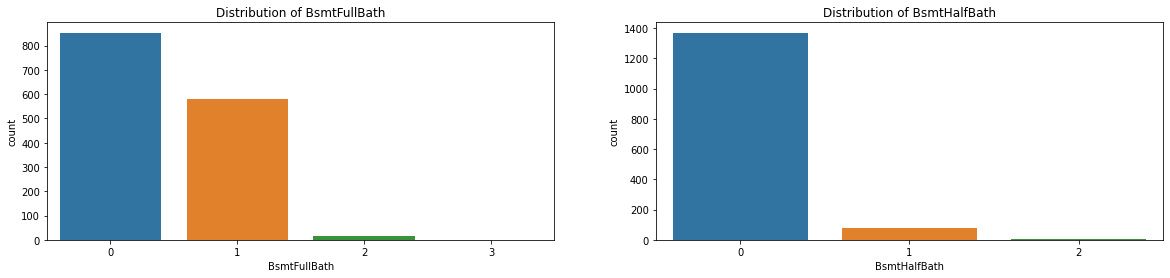

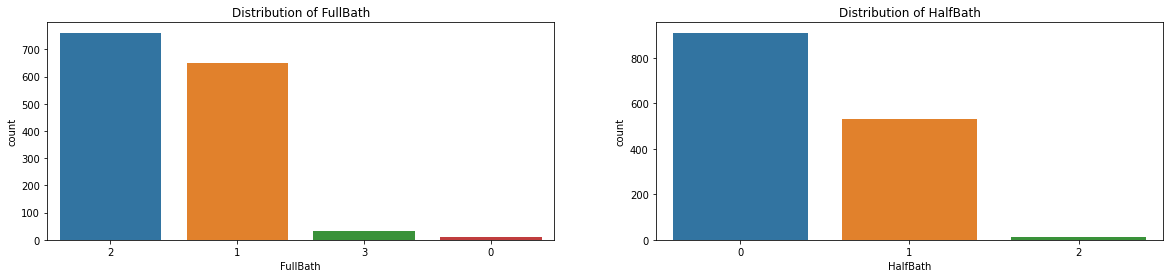

In [38]:
plotCategorical(data, ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'])

**Observations**:
1. Basement bathrooms are following pattern 0, 1, 2 and 3. Most houses are not having basement bathrooms both full and half bathrooms.
2. Coming to above grade bathrooms, most houses are with 2 fullbathrooms followed by 1.
3. Most houses dont have half bathrooms, followed by 1.

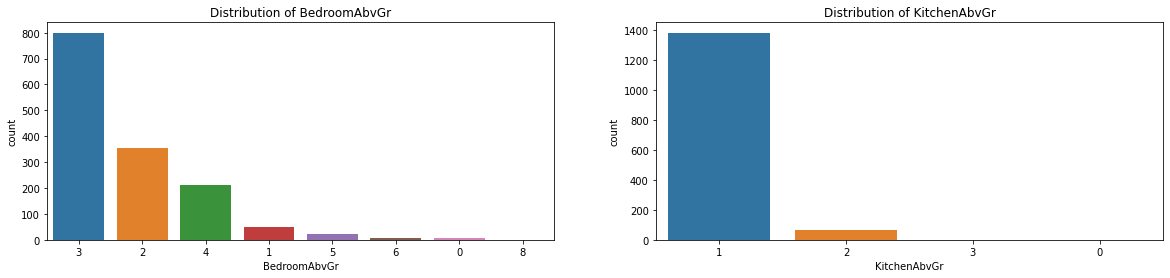

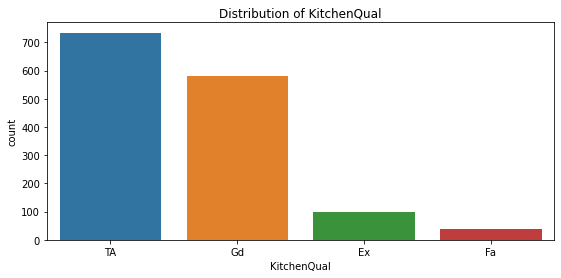

In [39]:
plotCategorical(data, ['BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual'])

**Observations**:
1. The houses are having bedrooms from 0 to 8. 3 bedroom houses are more.
2. Number of kitches are 1 for 90% of houses.
3. There are no kitchens which are having poor quality. about 50% houses are having average quality kitchens.

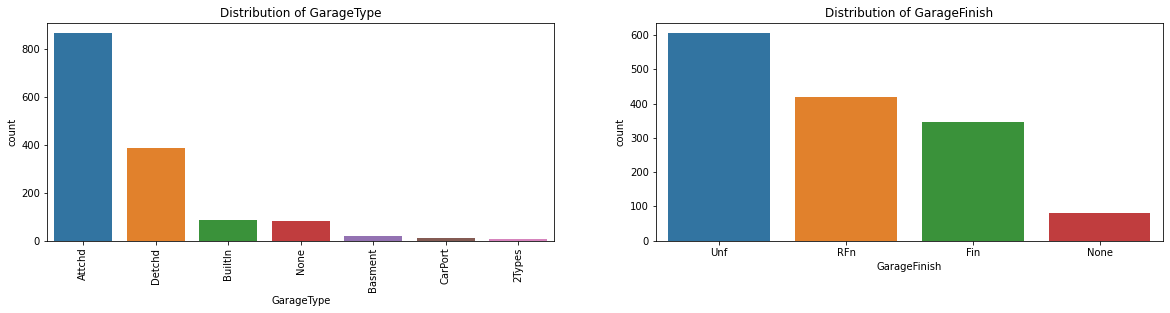

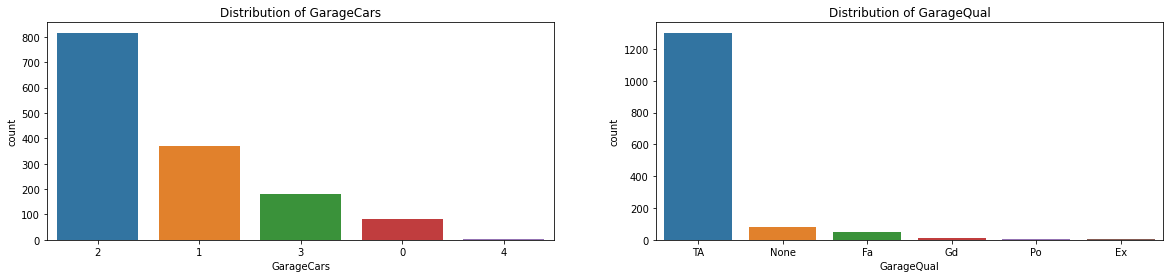

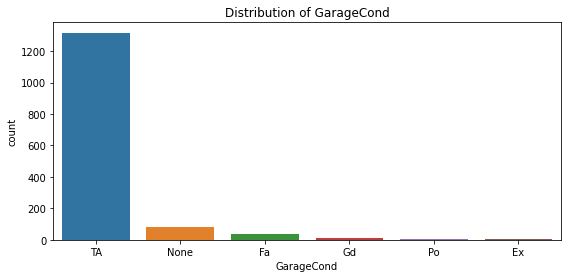

In [40]:
plotCategorical(data, ['GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond'])

**Observations**:
1. While above 50% houses have attached Garage, 5% dont have garage.
2. Most of houses have Unfinished garage, followed by Rough finished and finished.
3. Over 60% Garages can Accomidate 2 cars.
4. 90% of garages are average in quality and condition.

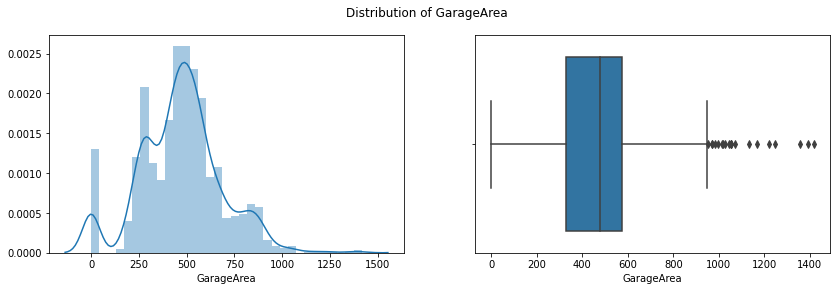

Skew     0.18258498282307278
count    1451.000000
mean      472.525155
std       214.171752
min         0.000000
5%          0.000000
25%       327.500000
50%       478.000000
75%       576.000000
95%       849.000000
99%      1004.500000
max      1418.000000
Name: GarageArea, dtype: float64


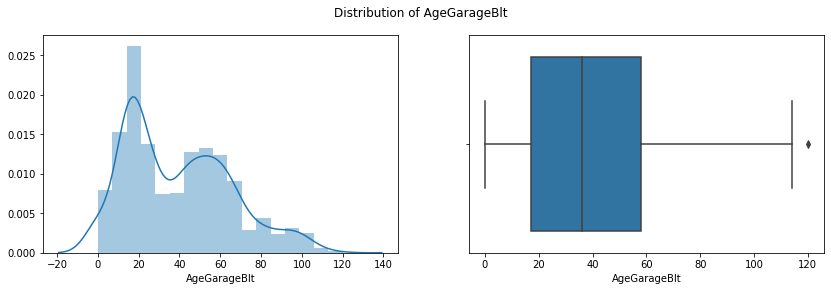

Skew     0.5667508245300007
count    1451.000000
mean       39.321847
std        25.823014
min         0.000000
5%          0.000000
25%        17.000000
50%        36.000000
75%        58.000000
95%        90.000000
99%       103.000000
max       120.000000
Name: AgeGarageBlt, dtype: float64


In [41]:
plotContinuous(data, ['GarageArea', 'AgeGarageBlt'])

**Observations**:
1. Garage Area and Age have 5% of **0** values, which means there is no garage.
2. The average area of garage is around 500.
3. Most of the garages were built in last 10-20 years.

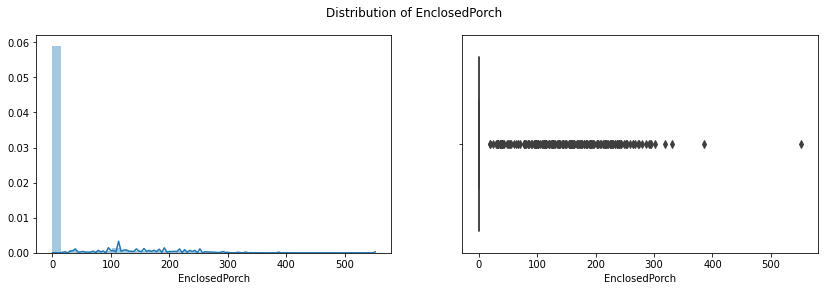

Skew     3.0940010943007756
count    1451.000000
mean       21.952447
std        61.108223
min         0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%         0.000000
95%       180.000000
99%       261.500000
max       552.000000
Name: EnclosedPorch, dtype: float64


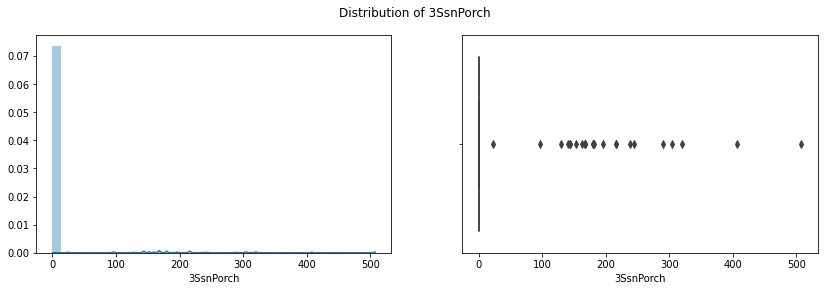

Skew     10.271741500340108
count    1451.000000
mean        3.430737
std        29.406940
min         0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%         0.000000
95%         0.000000
99%       168.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


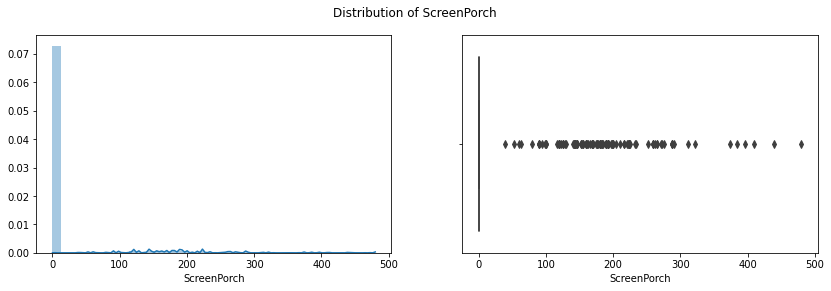

Skew     4.107410708562218
count    1451.000000
mean       15.154376
std        55.917522
min         0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%         0.000000
95%       160.000000
99%       268.500000
max       480.000000
Name: ScreenPorch, dtype: float64


In [42]:
plotContinuous(data, ['EnclosedPorch', '3SsnPorch', 'ScreenPorch'])

**Observations**:
1. All the 3 columns has more than 75% values are 0s. 
2. Which means the distributions are very much skewed.

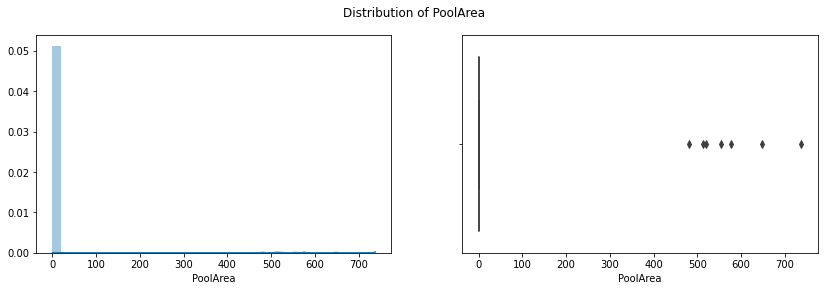

Skew     14.78206884801823
count    1451.000000
mean        2.776017
std        40.301212
min         0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%         0.000000
95%         0.000000
99%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


In [43]:
plotContinuous(data, ['PoolArea'])

**Observations**:  
The distribution is terrible skewed towards right side. We can see from stats 99% of values are 0 which means they dont have pool. Only 7 houses have Pools.

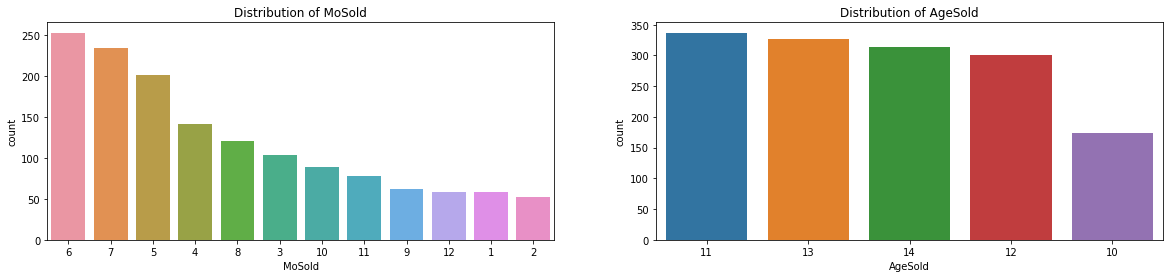

In [44]:
plotCategorical(data, ['MoSold', 'AgeSold'])

**Observations**:
1. Most Sales are done in the middle of the year(5, 6, 7 months).
2. All the sales are happened between 2006-2010. 
3. Each year has around 22% sales, except in 2010 where the sales are 10%.

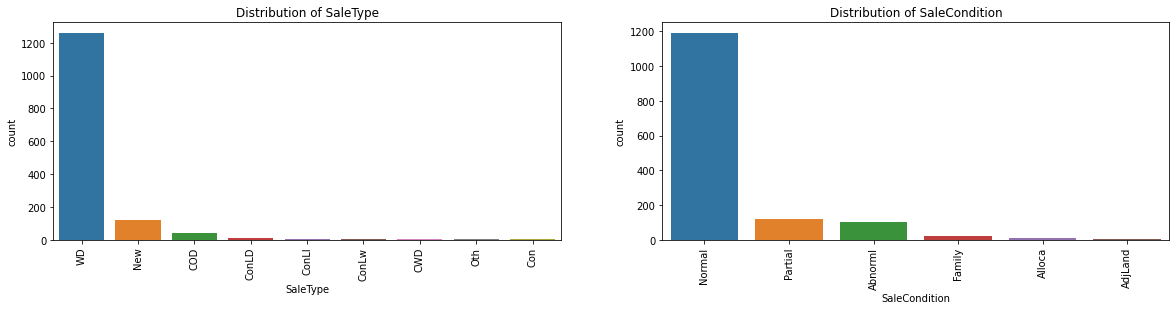

In [45]:
plotCategorical(data, ['SaleType', 'SaleCondition'])

**Observations**:
1. About 85% houses are sold with Warranty Deed - Conventional sale type.
2. And 80% of houses are sold in normal Condition.

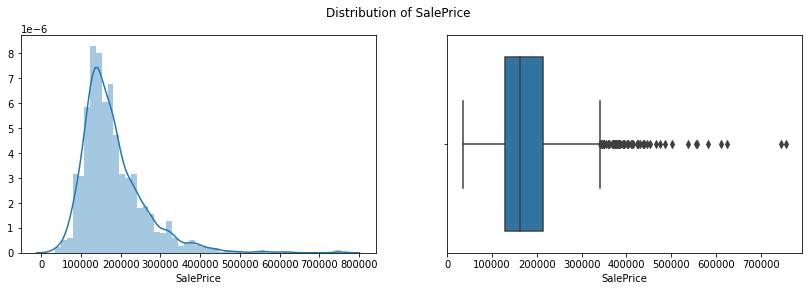

Skew     1.8831110462405252
count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
5%        88000.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
95%      325812.000000
99%      439390.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [46]:
plotContinuous(data, ['SalePrice'])

**Observations**:
1. The distribution is right skewed, as there are outliers on the right side.
2. There is a sudden jump of values from 95%. We can see 2 houses are sold above 7000000.

The regression models needs target variable to be normally distributed. But as we can see above plot and the skew values the SalePrice distribution is positively distribution. So, lets do some non linear transofrms and see which one fits best for us.

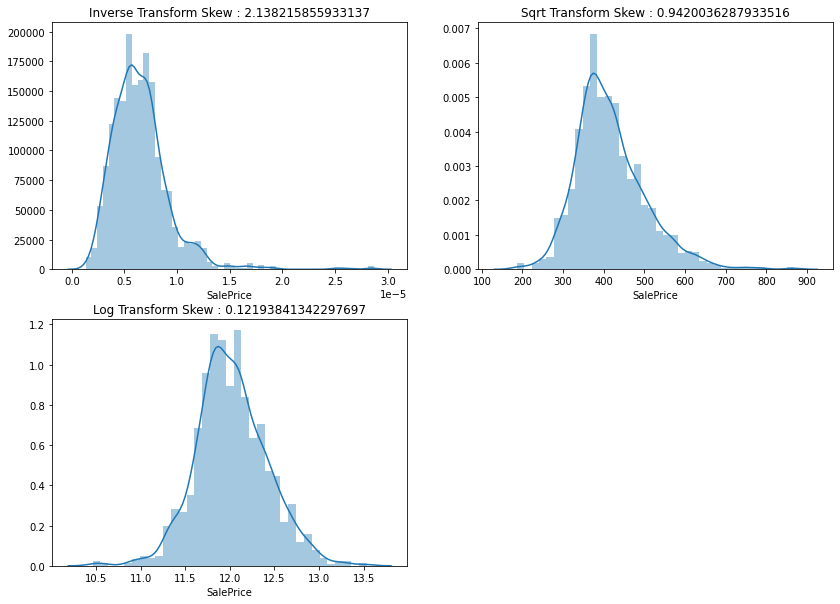

In [47]:
plt.figure(figsize=(14,10))
#inverse transform
inverse = data['SalePrice'].apply(lambda x:1/x)
plt.subplot(2,2,1)
sns.distplot(inverse)
plt.title("Inverse Transform Skew : "+str(inverse.skew()))

#square root transform
sqrt = data['SalePrice'].apply(lambda x:np.sqrt(x))
plt.subplot(2,2,2)
sns.distplot(sqrt)
plt.title("Sqrt Transform Skew : "+str(sqrt.skew()))

#log tansform
log = data['SalePrice'].apply(lambda x:np.log(x))
plt.subplot(2,2,3)
sns.distplot(log)
plt.title("Log Transform Skew : "+str(log.skew()))
plt.show()

We can see the skew is very less for **Log** transform compared to other transforms, and visually we can see the distribution is almost looks like normal distribution. 

### Bivariate Analysis

In [48]:
#plotting categorical data vs Continuous data
def plotCatvsCont(data, x, y, applyLog = False, estimator = np.mean):
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    if applyLog:
        sns.boxplot(x=x, y=np.log(data[y]), data=data)
    else:
        sns.boxplot(x=x, y=y, data=data)
    #rotate x-axis values when it has more charecters.
    if len([val for val in list(data[x].unique()) if type(val) == str and len(val) > 4 ]) > 2:
        plt.xticks(rotation=90)
    plt.subplot(122)
    sns.barplot(x=x, y=data[y], data=data, estimator=estimator)
    #rotate x-axis values when it has more charecters.
    if len([val for val in list(data[x].unique()) if type(val) == str and len(val) > 4 ]) > 2:
        plt.xticks(rotation=90)
    plt.show()

In [49]:
#joint plot for two continuous variables
def plotContvsCont(data, x, y = 'SalePrice', applyLog = False):
    if applyLog:
        p = sns.jointplot(x=np.log(data[x]), y=np.log(data[y]), data=data, kind="reg")
        plt.xlabel('log '+x)
        plt.ylabel('log '+y)
    else:
        p = sns.jointplot(x=x, y=y, data=data, kind="reg")
    p.fig.suptitle(x+' vs '+y)
    print("Corr Coef : "+str(np.corrcoef(x=data[x], y=data[y])[0][1]))

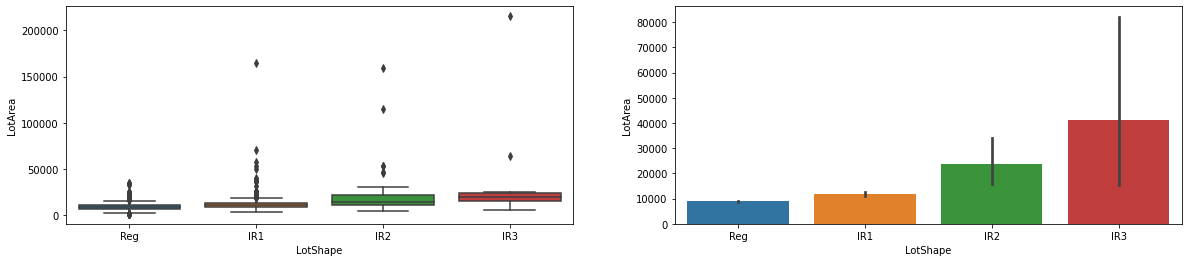

In [50]:
#lotshape vs Lot Area
plotCatvsCont(data, 'LotShape', 'LotArea')

**Observations**:  
Average lot area is increasing with the irregularity in the Lot Shape. All the Lot shapes have outliers .

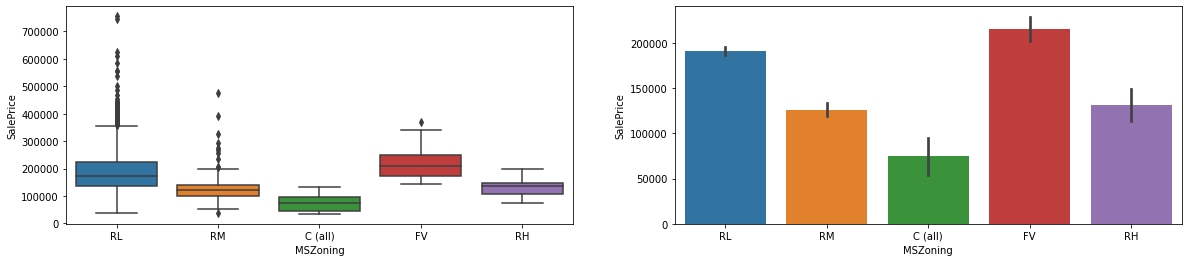

In [51]:
#MSZoning vs SalePrice
plotCatvsCont(data, 'MSZoning', 'SalePrice')

**Observations**:  
Floating Village Residential houses are sold with higher price, followed by Residential Low Density Zone house. The commercial houses are prices lowest.

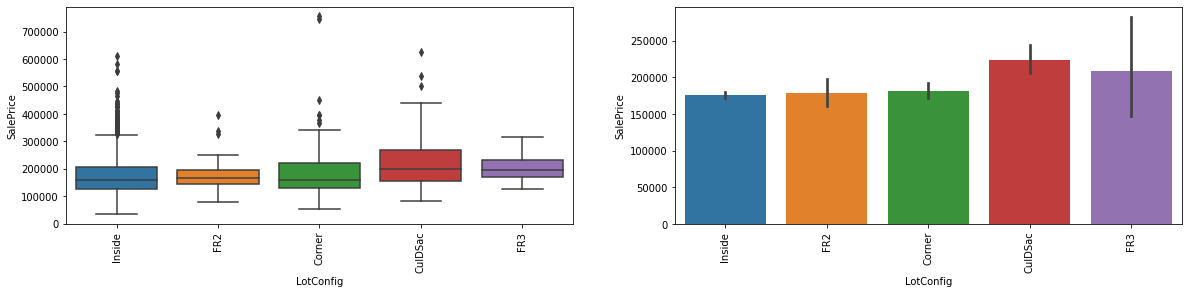

In [52]:
#LotConfig vs SalePrice
plotCatvsCont(data, 'LotConfig', 'SalePrice')

**Observations**:
1. Cul-de-Sac and FR3 Lot properties are priced higher than other 3 types. 
2. Cul-de-Sac type has more spreaded values than FR3. and we can see from bar plot, Cul-de-sac is higher than FR3 this is because Cul-de-sac has outliers and also more values are there above median.

Corr Coef : 0.3332063050587535


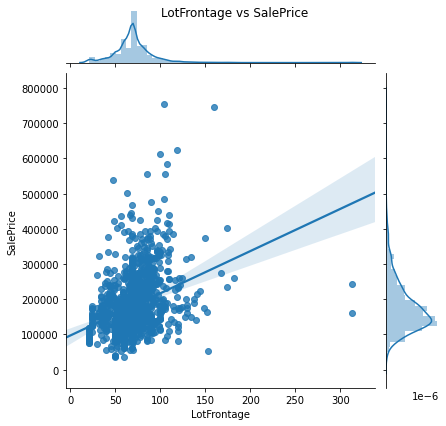

In [53]:
#LotFrontage vs SalePrice
plotContvsCont(data, 'LotFrontage', 'SalePrice')

**Observations**:
1. There is a linear relation between SalePrice and LotFrontage.
2. The regression line is highly affected by the outliers in LotFrontage.

Corr Coef : 0.26466822224254855


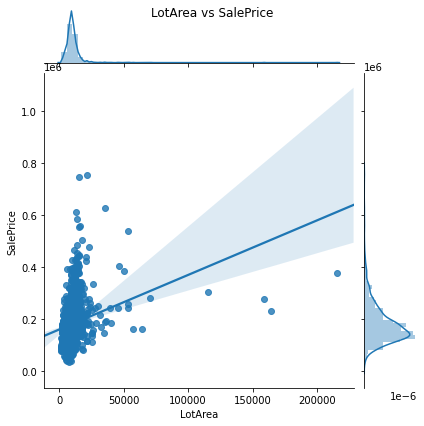

In [54]:
#LotArea vs SalePrice
plotContvsCont(data, 'LotArea', 'SalePrice')

**Observations**:
The outliers are very much affecting the relation between LotArea and SalePrice. The correlation coefficiant is very low.

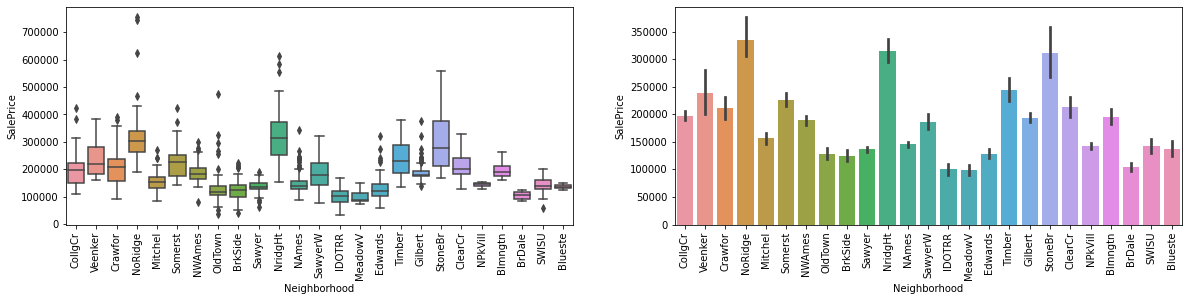

In [55]:
plotCatvsCont(data, 'Neighborhood', 'SalePrice')

**Observations**:
1. Neighborhood of the property is indeed causing the price changes.
2. Northridge, Stone Brook, Northridge Heights has high average sale price compared to other nneighborhoods.

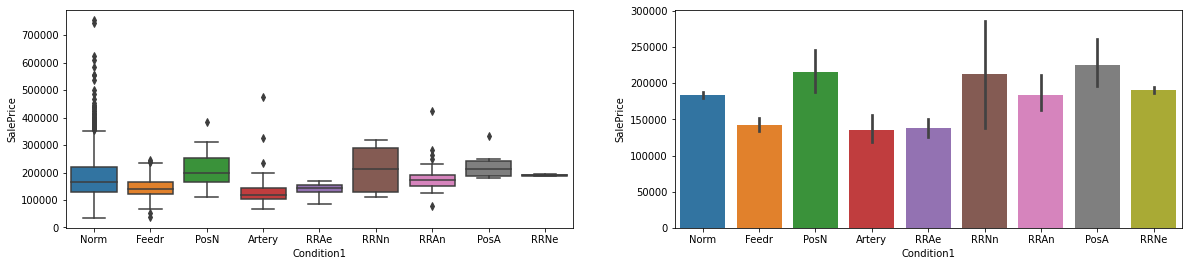

In [56]:
plotCatvsCont(data, 'Condition1', 'SalePrice')

**Observations**: Houses Within 200' of North-South Railroad, and near and adjecent to positive off-site feature are sold with high price.

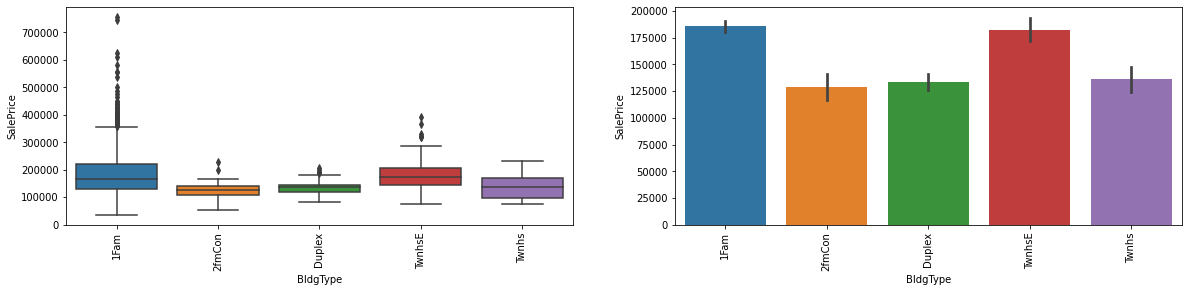

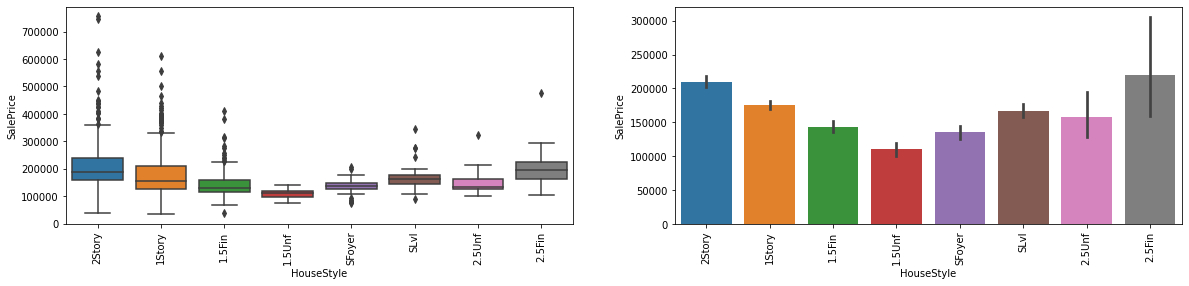

In [57]:
plotCatvsCont(data, 'BldgType', 'SalePrice')
plotCatvsCont(data, 'HouseStyle', 'SalePrice')

**Observations**:
1. Single Family detached(1Fam) and Townhouse End Unit(TwnhsE) type houses are sold at high price. We can there are more outliers in 1Fam types.
2. While 2 story and 2.5 story houses sold at high price, 1.5 story unfinished houses are sold at low price.

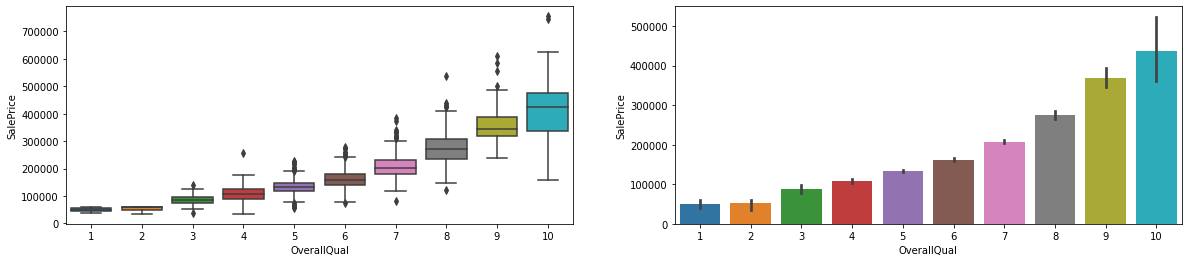

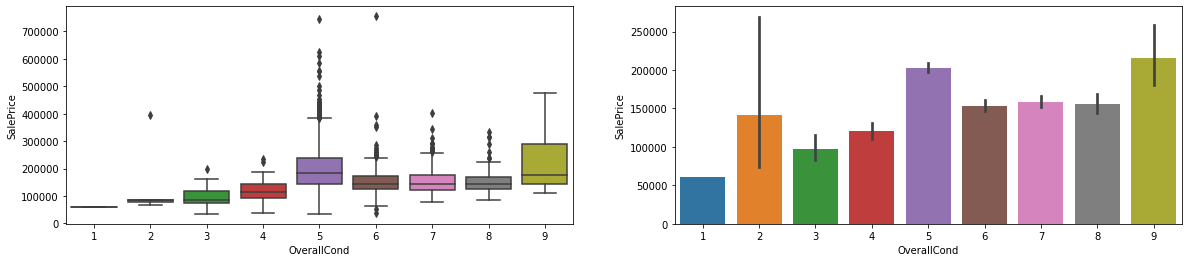

In [58]:
plotCatvsCont(data, 'OverallQual', 'SalePrice')
plotCatvsCont(data, 'OverallCond', 'SalePrice')

**Observations**:
1. Overall quality is working for sale price. Higher the quality higher the price.
2. Overall Conditions is bit abnormal. Average(5) and higher(9) Condition rated houses are prices high than other ratings.

Corr Coef : -0.523273799648845


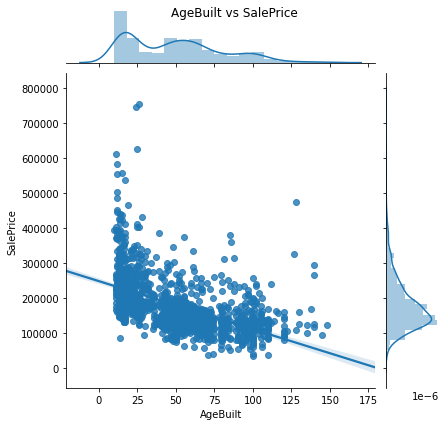

In [59]:
plotContvsCont(data, 'AgeBuilt', 'SalePrice')

Corr Coef : -0.5074880521898544


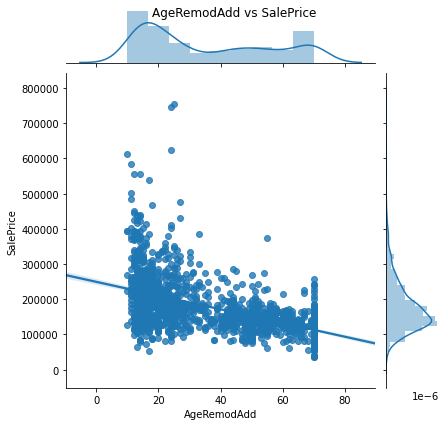

In [60]:
plotContvsCont(data, 'AgeRemodAdd', 'SalePrice')

**Observations**:
1. Both Remodified age and constructed age are negatively correlated with Sale price.
2. Higher the age of house lower the price of house.

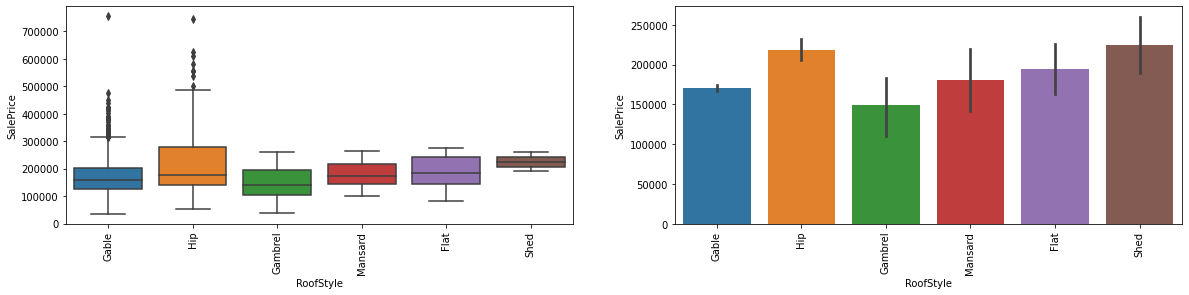

In [61]:
plotCatvsCont(data, 'RoofStyle', 'SalePrice')

**Observations**:
1. Hip style roof houses are having price high than others.
2. The average price for hip and shed roof styles are high than others.

Corr Coef : 0.47748621967596805


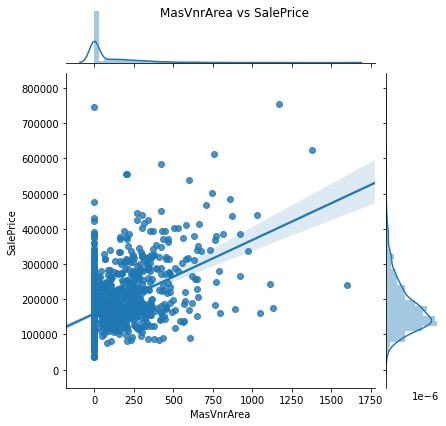

In [62]:
plotContvsCont(data, 'MasVnrArea', 'SalePrice')

**Observations**:
1. There is a positive linear correlation between price and MaVnrArea.
2. The price is spreaded all over at MasVanArea 0 value.

Corr Coef : 0.6132992899680302


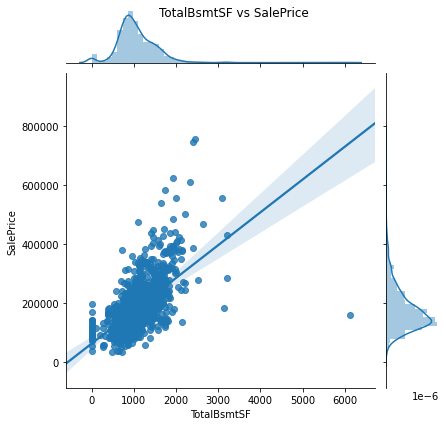

In [63]:
plotContvsCont(data, 'TotalBsmtSF', 'SalePrice')

**Observations**:
The Basement area is very much positively correlated with Sale price.

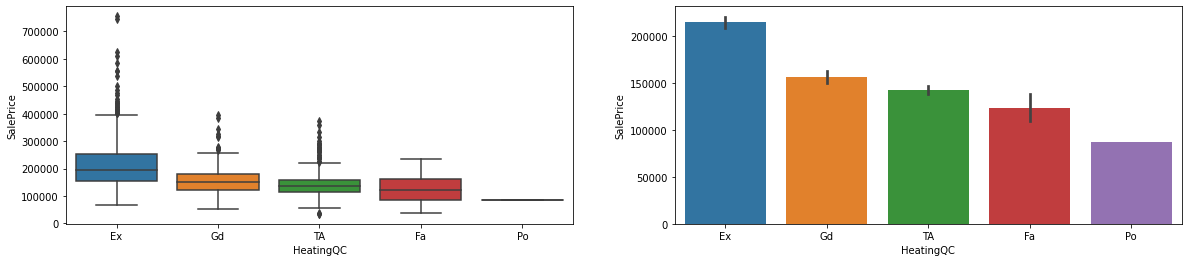

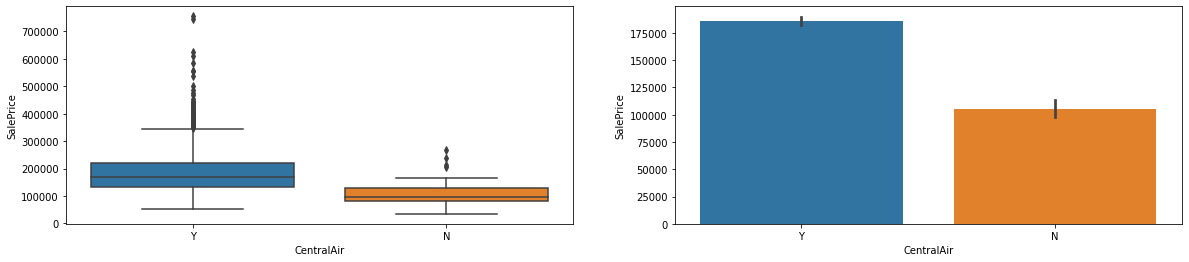

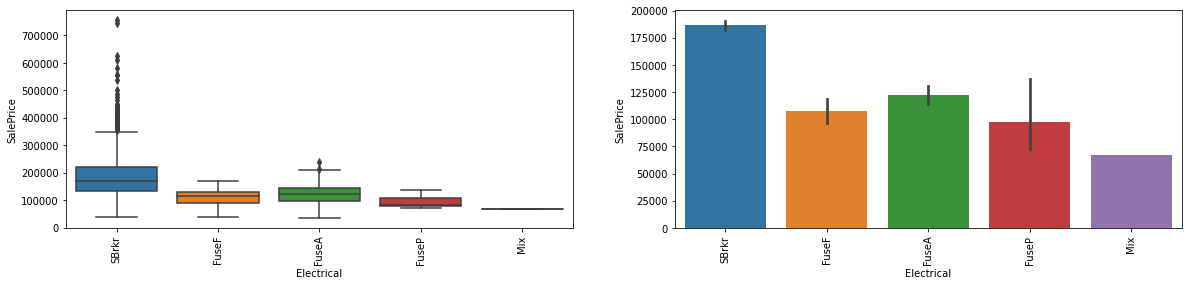

In [64]:
plotCatvsCont(data, 'HeatingQC', 'SalePrice')
plotCatvsCont(data, 'CentralAir', 'SalePrice')
plotCatvsCont(data, 'Electrical', 'SalePrice')

**Observations**:
1. Heating quality is really working. Excellent quality heating are highly priced and poor quality heating has low priced.
2. Houses with Central Air conditioning has high price.
3. Standard Circuit breaker equiped houses are priced high than others.

Corr Coef : 0.6069686642164591


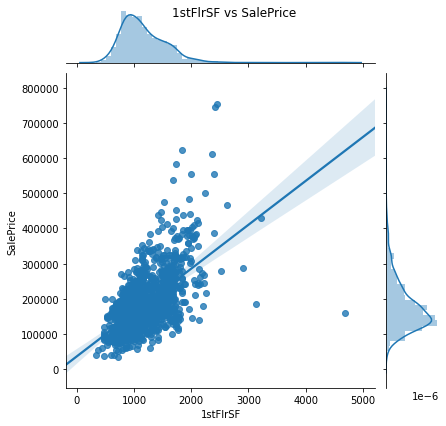

In [65]:
plotContvsCont(data, '1stFlrSF', 'SalePrice')

Corr Coef : 0.3228396321521066


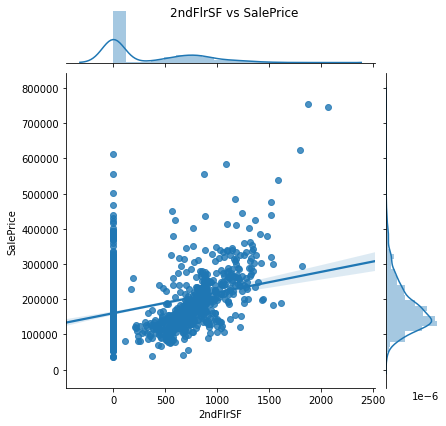

In [66]:
plotContvsCont(data, '2ndFlrSF', 'SalePrice')

**Observations**:
1. 1StFloor area is positively correlated with Sale Price. The scatter plot looks like a cone.
2. 2ndFloor area is also positively correlated but we can see there is a straight line for sales price when 2nd floor area is 0, this is because some houses have only 1 floor.

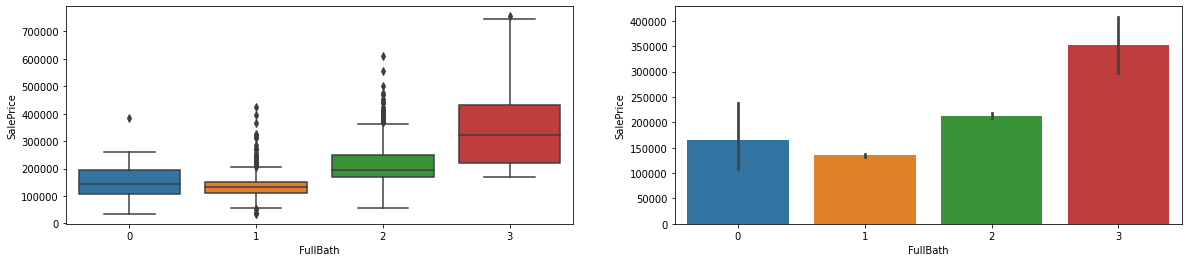

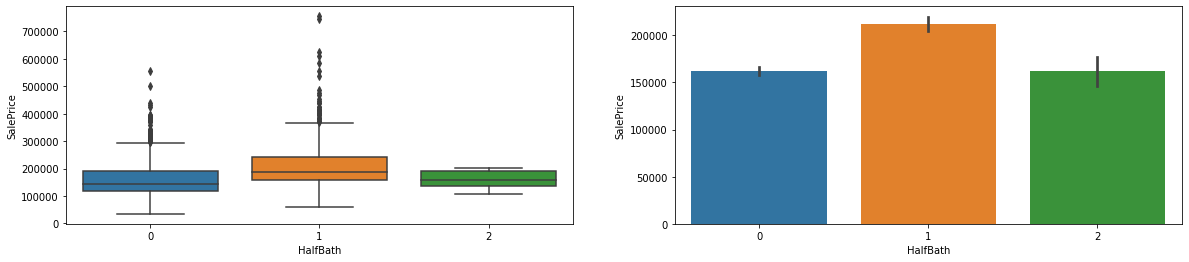

In [67]:
plotCatvsCont(data, 'FullBath', 'SalePrice')
plotCatvsCont(data, 'HalfBath', 'SalePrice')

**Observations**:
1. Properties with 3 Full bathrooms have Higher price, and distribution is spreaded more for 3 full bathrooms price than others.
2. Half bathrooms vs Sale price is bit different. 0 and 2 half bathroom houses are priced same and are less han 2 half bathroom houses.

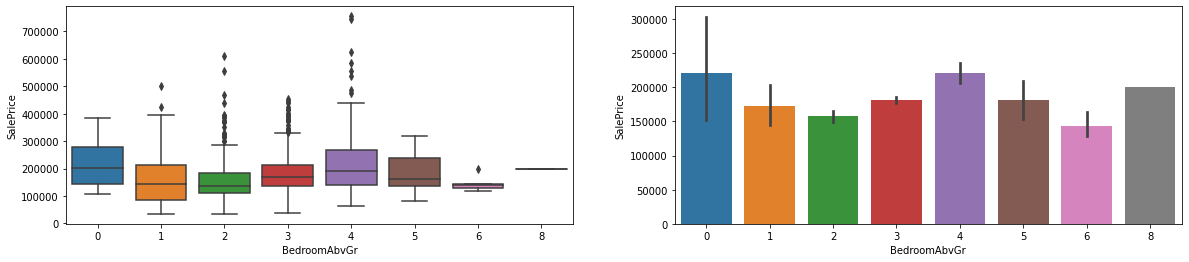

In [68]:
plotCatvsCont(data, 'BedroomAbvGr', 'SalePrice')

**Observations**:
Number of bedrooms versus price of house graph is abnormal. Houses with 4 and 0 bedrooms are priced higher then other.

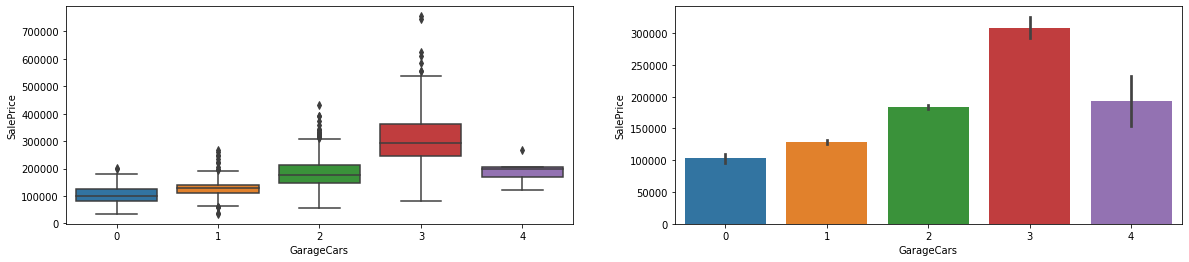

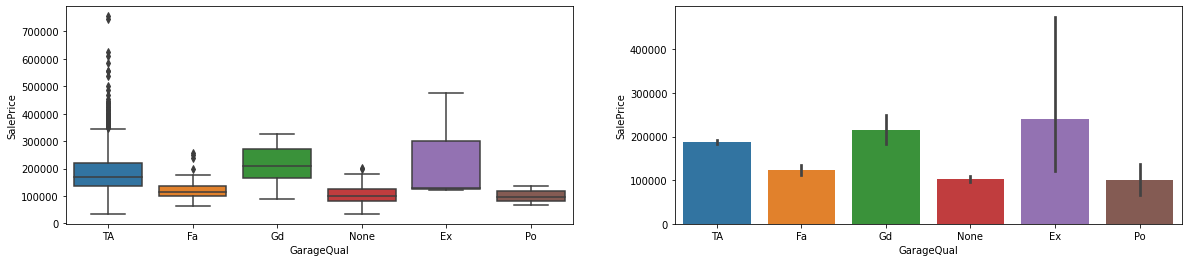

In [69]:
plotCatvsCont(data, 'GarageCars', 'SalePrice')
plotCatvsCont(data, 'GarageQual', 'SalePrice')

**Observations**:
1. As the number of cars that a garage can accomidate increases, the price of house also increase except for 4 number of cars, this could be due to the data is very less.
2. The garage quality and house price is also positively correlated. As the quality is high the price also high.

Corr Coef : 0.622483565730011


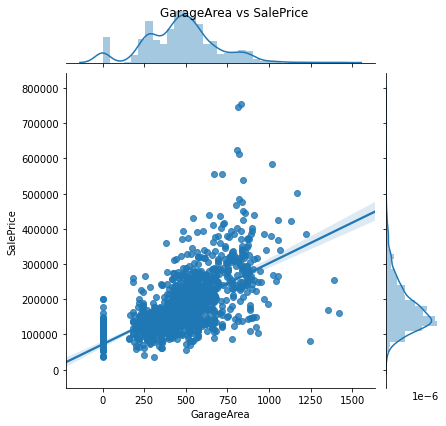

In [70]:
plotContvsCont(data, 'GarageArea', 'SalePrice')

**Observations**:
Garage area is positively correlated with the price of house. At 0 area the price is not correlated at all.

Corr Coef : -0.3491380925735641


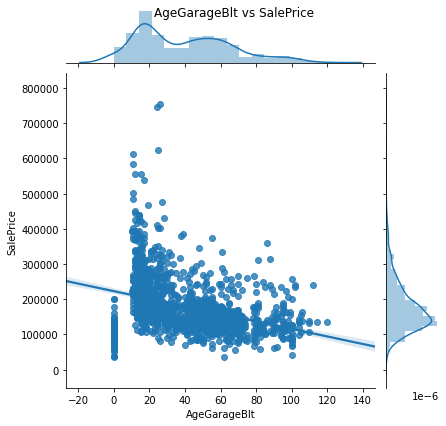

In [71]:
plotContvsCont(data, 'AgeGarageBlt', 'SalePrice')

**Observations**:
House price and garage constructed age is similar to the house construction age and price. This is also negatively correlated.

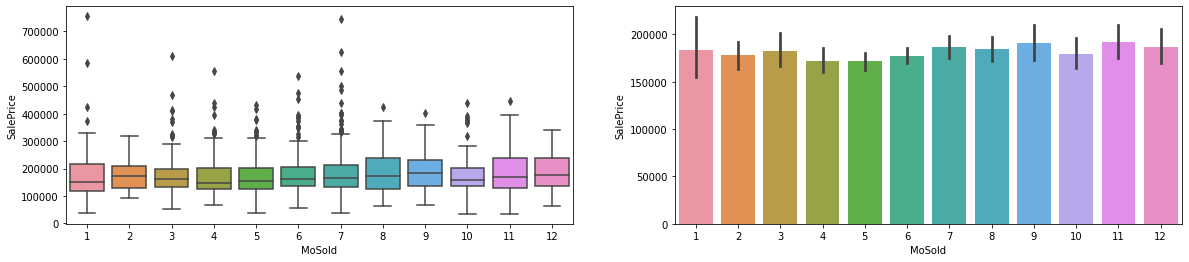

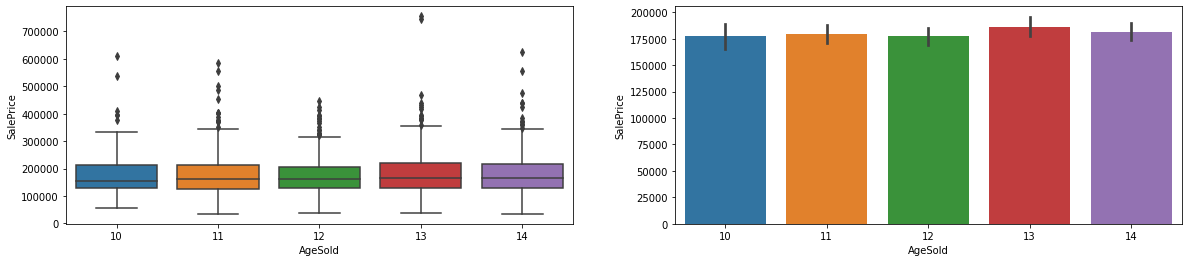

In [72]:
plotCatvsCont(data, 'MoSold', 'SalePrice')
plotCatvsCont(data, 'AgeSold', 'SalePrice')

**Observations**:
There is not specific pattern between Month of sale and year of sale versus Price.

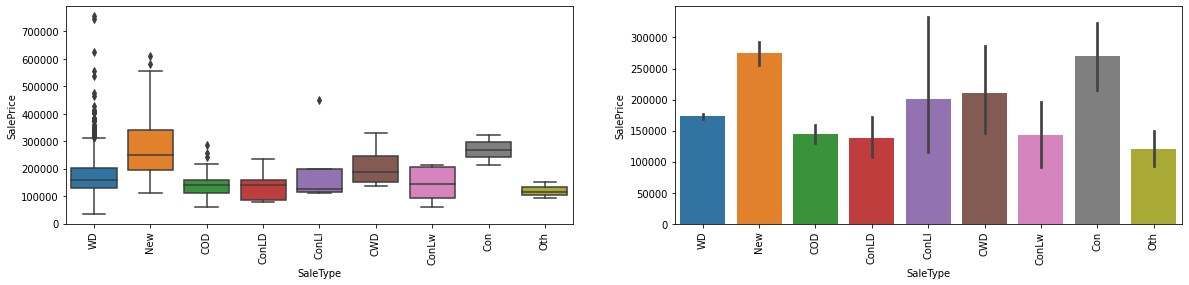

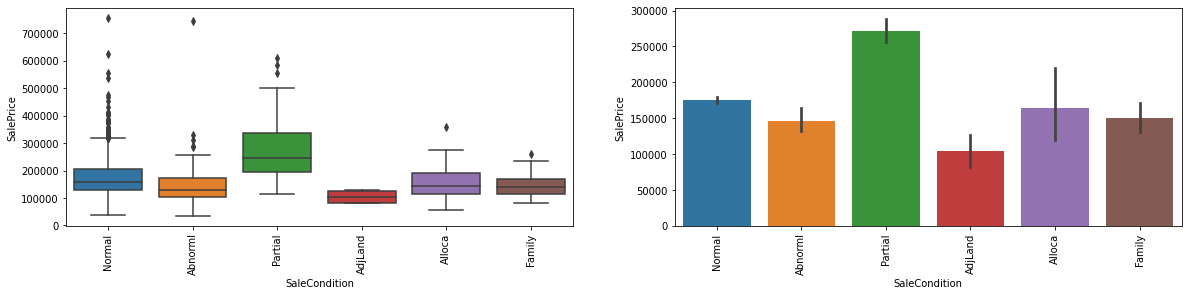

In [73]:
plotCatvsCont(data, 'SaleType', 'SalePrice')
plotCatvsCont(data, 'SaleCondition', 'SalePrice')

**Observations**:
1. Houses that are newly build are sold with higher price.
2. House price is high when Adjoining Land also purchased.
3. Coming to the SaleCondition, houses that are not completed nothing(for newly constructed houses) are having higher price.

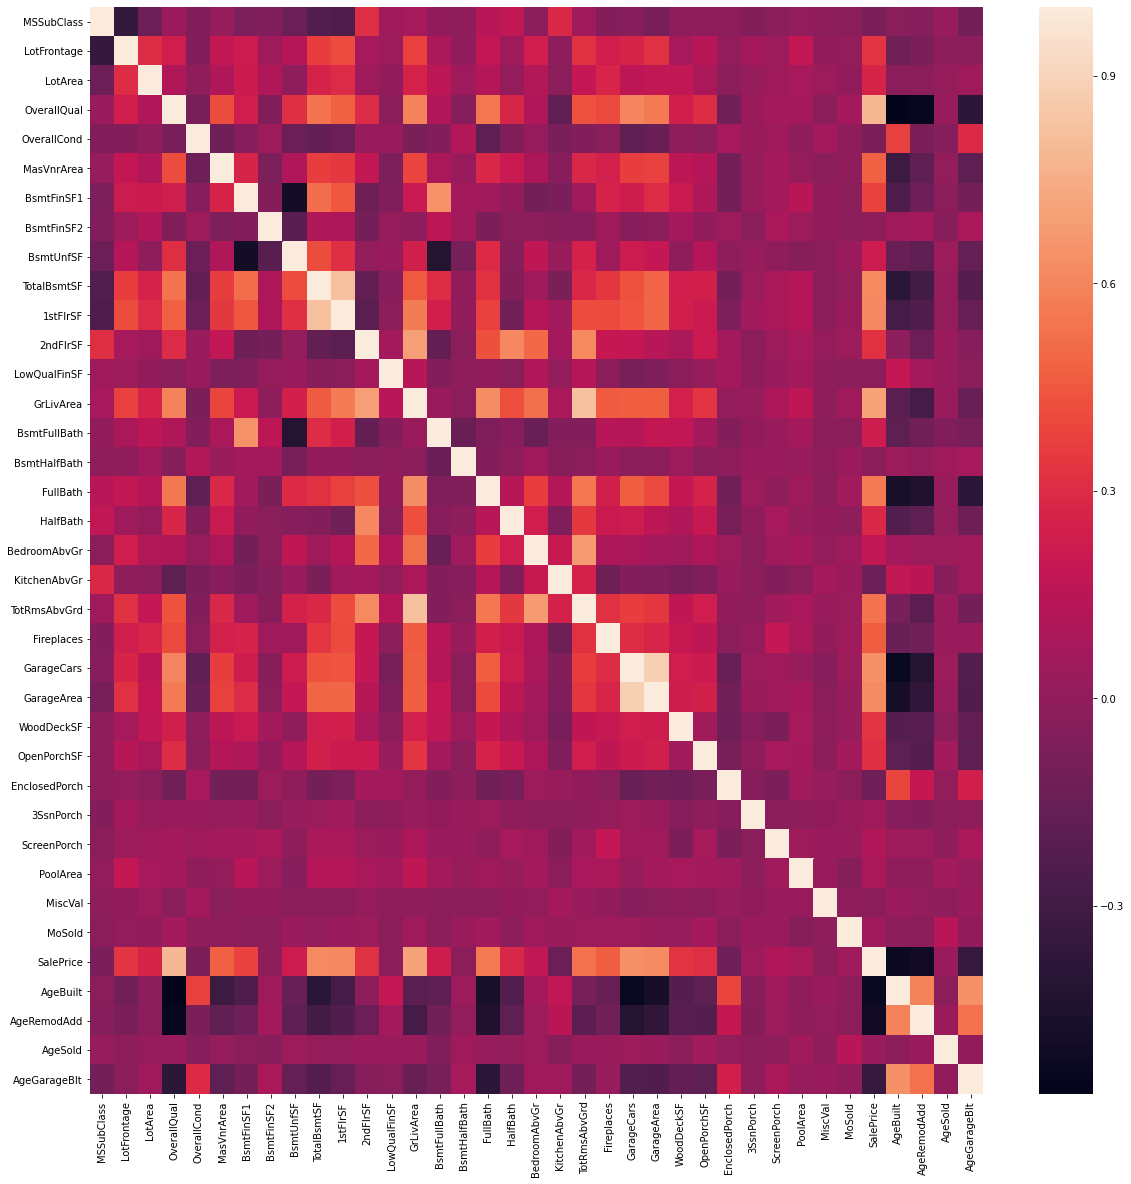

In [74]:
#Correlation
corr_matrix = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix)

**Observations**:
1. As expected we can see SalePrice is highly correlated with Overalll Quality.
2. Also Age of house, remodified age, and garage constructed age are negatively correlated with SalePrice.
3. 3SsnPorch, ScreenPorch and PoolArea are not correlated with SalePrice.

### Variable Transformation

Before transforming columns, from EDA we have seen _Street, Utilities_ has mostly same value and skewed. _PoolArea_ also have most of the values are 0s. let's removed them.

In [75]:
data.drop(['Street', 'Utilities', 'PoolArea'], axis=1, inplace=True)

The columns _EnclosedPorch, 3SsnPorch, ScreenPorch_ has over 75% 0 values. These variables can not contribute to  us, so let's remove these also.

In [76]:
data.drop(['EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)

As SalePrice is not normally distributed, we want to transform the data using **Log**.

In [77]:
data['SalePrice'] = data['SalePrice'].apply(lambda x:np.log(x))

Columns such as _ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond_ has rating related data.Let's see the unique values in each column.

In [78]:
cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']
for col in cols:
    values = data[col].unique()
    values.sort()
    print(col)
    print(values)

ExterQual
['Ex' 'Fa' 'Gd' 'TA']
ExterCond
['Ex' 'Fa' 'Gd' 'Po' 'TA']
BsmtQual
['Ex' 'Fa' 'Gd' 'None' 'TA']
BsmtCond
['Fa' 'Gd' 'None' 'Po' 'TA']
HeatingQC
['Ex' 'Fa' 'Gd' 'Po' 'TA']
KitchenQual
['Ex' 'Fa' 'Gd' 'TA']
FireplaceQu
['Ex' 'Fa' 'Gd' 'None' 'Po' 'TA']
GarageQual
['Ex' 'Fa' 'Gd' 'None' 'Po' 'TA']
GarageCond
['Ex' 'Fa' 'Gd' 'None' 'Po' 'TA']


As the rating is ordered categorical value. let's encode this as number for each rating.

In [79]:
#Mapping Excellent as 5 and reducing values by 1 for next ratings. None will be marked as 0.
mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0 }

In [80]:
for col in cols:
    data[col] = data[col].map(mapping)
data[cols].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
0,4,3,4,3,5,4,0,3,3
1,3,3,4,3,5,3,3,3,3
2,4,3,4,3,5,4,3,3,3
3,3,3,3,4,4,4,4,3,3
4,4,3,4,3,5,4,3,3,3


In [81]:
data['BsmtExposure'] = data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None':0})

In [82]:
data['BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf':1, 'None':0})
data['BsmtFinType2'] = data['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf':1, 'None':0})

In [83]:
data['CentralAir'] = data['CentralAir'].map({'Y':1, 'N':0})

In [84]:
obj_cols = data.select_dtypes('object').columns
dummy = pd.get_dummies(data.loc[:, obj_cols], drop_first=True)

In [85]:
final_data = pd.concat([data, dummy], axis=1)
final_data.drop(obj_cols, axis=1, inplace=True)
final_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MiscVal,MoSold,SalePrice,AgeBuilt,AgeRemodAdd,AgeSold,AgeGarageBlt,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,4,3,4,3,1,6,706,1,0,150,856,5,1,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,2,548,3,3,0,61,0,2,12.247694,17,17,12,17.0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,3,3,4,3,4,5,978,1,0,284,1262,5,1,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,2,460,3,3,298,0,0,5,12.109011,44,44,13,44.0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0

### Test Train Split & Stadardising features

Splitting data into test and train. Making train and test percentage 70 and 30% respectively.

In [86]:
df_train, df_test = train_test_split(final_data, test_size = 0.3, random_state = 100)

In [87]:
cont_cols = [ 'MSSubClass', 'LotFrontage', 'LotArea', 'BsmtFinSF1', 
             'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
            'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
            'AgeBuilt', 'AgeRemodAdd', 'AgeSold', 'AgeGarageBlt', 'SalePrice']

In [88]:
scaler = StandardScaler()
scaler.fit(df_train.loc[:, cont_cols])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [89]:
df_train.loc[:, cont_cols] = scaler.transform(df_train.loc[:, cont_cols])
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MiscVal,MoSold,SalePrice,AgeBuilt,AgeRemodAdd,AgeSold,AgeGarageBlt,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
801,-0.650652,-1.298599,-0.513865,4,7,0.0,3,3,3,3,1,2,-0.502945,1,-0.297804,0.936307,0.294756,5,1,0.093340,-0.806741,-0.119133,-0.596512,1,0,1,0,2,1,3,5,0,0,2,-0.162574,3,3,-0.736684,-0.689360,0,7,-1.048280,1.872354,-0.238209,0.624342,0.913505,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
569,0.788676,-0.041883,-0.315476,5,5,0.0,3,3,4,3,4,6,1.097605,1,-0.297804,-1.320626,-0.273317,3,1,-0.544243,-0.806741,-0.119133,-1.065805,1,0,1,0,2,1,3,4,2,3,2,0.591510,3,3,-0.392118,-0.689360,0,12,-0.516685,-0.236493,0.301373,1.371639,0.062039,0,0,1,0,0,0,0,0,0,1,0,0

Applying scalar tranform on test data also.

In [90]:
df_test.loc[:, cont_cols] = scaler.transform(df_test.loc[:, cont_cols])
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MiscVal,MoSold,SalePrice,AgeBuilt,AgeRemodAdd,AgeSold,AgeGarageBlt,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
357,1.508340,-1.125258,-0.565062,5,5,0.0,3,3,4,3,1,5,0.949564,1,-0.297804,-0.715162,0.173507,3,1,-0.042745,-0.806741,-0.119133,-0.696677,1,0,1,1,3,1,3,6,1,1,2,0.252172,3,3,3.660645,0.608464,0,8,-0.552961,-0.136072,0.448532,0.624342,0.178148,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
824,-0.890540,0.478137,0.056414,8,5,0.0,4,3,4,4,1,1,-0.925611,1,-0.297804,2.043312,0.952643,5,1,0.831728,-0.806741,-0.119133,-0.053023,0,0,2,0,3,1,4,7,1,4,2,1.421001,3,3,-0.736684,1.329477,0,6,0.824755,-1.140284,-1.023055,1.371639,-0.982942,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,

Seperating Target and independent variables.

In [91]:
y_train = df_train['SalePrice']
y_test = df_test['SalePrice']
X_train = df_train.loc[:, df_train.columns != 'SalePrice']
X_test = df_test.loc[:, df_test.columns != 'SalePrice']

### Model Building

Let's try to build the Linear regression model with all the variables.

In [92]:
lr = LinearRegression()
lr.fit(X_train, y_train)

#train data prediction
y_train_pred = lr.predict(X_train)
print("Train R Square : ",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

Train R Square :  0.9524163144231407


In [93]:
y_test_pred = lr.predict(X_test)
print("Test R Square : ",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Test R Square :  0.7027635838392571


The model performed better on train data but not on test data. 

#### RFE

In [94]:
X_train.shape

(1015, 199)

We have 199 features. So, we will use RFE to select the top 60 features and then we will use Regularisation to those features. 

In [95]:
lr = LinearRegression()
#Feature selection with RFE
selector = RFE(lr, 50)
selector.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=50, step=1, verbose=0)

In [96]:
#creating feature variables according to their ranks
features = pd.DataFrame()
features['name'] = X_train.columns
features['support'] = selector.support_
features['rank'] = selector.ranking_
features.sort_values(by='rank')

,name,support,rank
198,SaleCondition_Partial,True,1
140,Exterior2nd_CBlock,True,1
64,Neighborhood_ClearCr,True,1
127,Exterior1st_CemntBd,True,1
126,Exterior1st_CBlock,True,1
124,Exterior1st_BrkComm,True,1
187,SaleType_Con,True,1
122,RoofMatl_WdShngl,True,1
121,RoofMatl_WdShake,True,1
120,RoofMatl_Tar&Grv,True,1


Seelecting top 50 features i.e., rank 1 features.

In [97]:
top_features = features[features['rank'] == 1]['name']

In [98]:
X_train = X_train[top_features]
X_test = X_test[top_features]
X_train.head()

,OverallQual,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,KitchenAbvGr,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_MeadowV,Condition1_Norm,Condition2_Norm,Condition2_PosA,Condition2_PosN,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_VinylSd,Exterior2nd_CBlock,Exterior2nd_CmentBd,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Sev,Functional_Typ,GarageType_None,SaleType_Con,SaleType_ConLD,SaleType_New,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
801,4,0.936307,0.294756,1,0.093340,-0.806741,-0.596512,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
569,5,-1.320626,-0.273317,1,-0.544243,-0.806741,-1.065805,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1181,8,-1.049523,1.201876,1,1.242503,-0.806741,0.249328,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
808,5,-0.462133,-0.091444,1,-0.183870,-0.806741,-0.800552,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1095,6,1.593732,0.559707,1,0.390711,-0.806741,-0.377633,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [99]:
print(X_train.shape)
print(X_test.shape)

(1015, 50)
(436, 50)


#### Ridge Regression Model

In [100]:
#Configuring KFold with 5 folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

#range of hyperparameters
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0, 100.0]}
#Ridge model
model = Ridge()

#grid search CV
model_r_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True)            
model_r_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0,
                                   20.0, 30.0, 40.0, 50.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=0)

In [101]:
cv_results = pd.DataFrame(model_r_cv.cv_results_, columns = ['param_alpha', 'mean_train_score', 'mean_test_score'])
cv_results.head()

,param_alpha,mean_train_score,mean_test_score
0,0.001,-0.217776,-0.266721
1,0.01,-0.218526,-0.265950
2,0.05,-0.221960,-0.264627
3,0.1,-0.225618,-0.264700
4,0.5,-0.238706,-0.267645


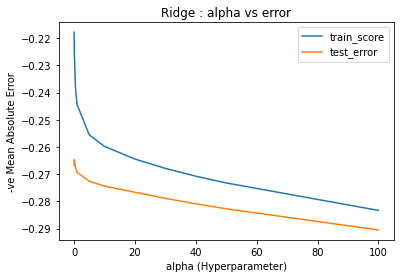

In [102]:
# Hyperparameter vs scoring values
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha (Hyperparameter)')
plt.ylabel('-ve Mean Absolute Error')
plt.legend(['train_score', 'test_error'], loc='upper right')
plt.title('Ridge : alpha vs error')
plt.show()

At alpha = 10, we can see the difference between train and validation negative mean absolute error(nMAE) is quite less than alpha < 10. After alpha > 10 the difference between train andvalidation score is not much changed and but error is much larger. So, choosing alpha=10 will be optimal hyper parameter value.

In [115]:
# model with optimal alpha
rm = Ridge(alpha=10)
rm.fit(X_train, y_train)

# predict
y_train_pred = rm.predict(X_train)
print("Train R2 score : ",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = rm.predict(X_test)
print("Test R2 score : ",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Train R2 score :  0.8493682728609784
Test R2 score :  0.8537995232095129


We can say model is performing similar on both training and test data. R square value for test is 0.85 which is saying the model is doing pretty good.

In [118]:
# ridge model parameters
model_parameters = list(rm.coef_)
model_parameters.insert(0, rm.intercept_)
model_parameters = [round(p, 3) for p in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "intercept")
ridge_coeff = pd.DataFrame(zip(cols, model_parameters))
ridge_coeff.rename({0:'feature', 1:'coeff'}, axis=1, inplace=True)
ridge_coeff.head()

,feature,coeff
0,intercept,-3.504
1,OverallQual,0.305
2,BsmtUnfSF,-0.096
3,TotalBsmtSF,0.057
4,CentralAir,0.359


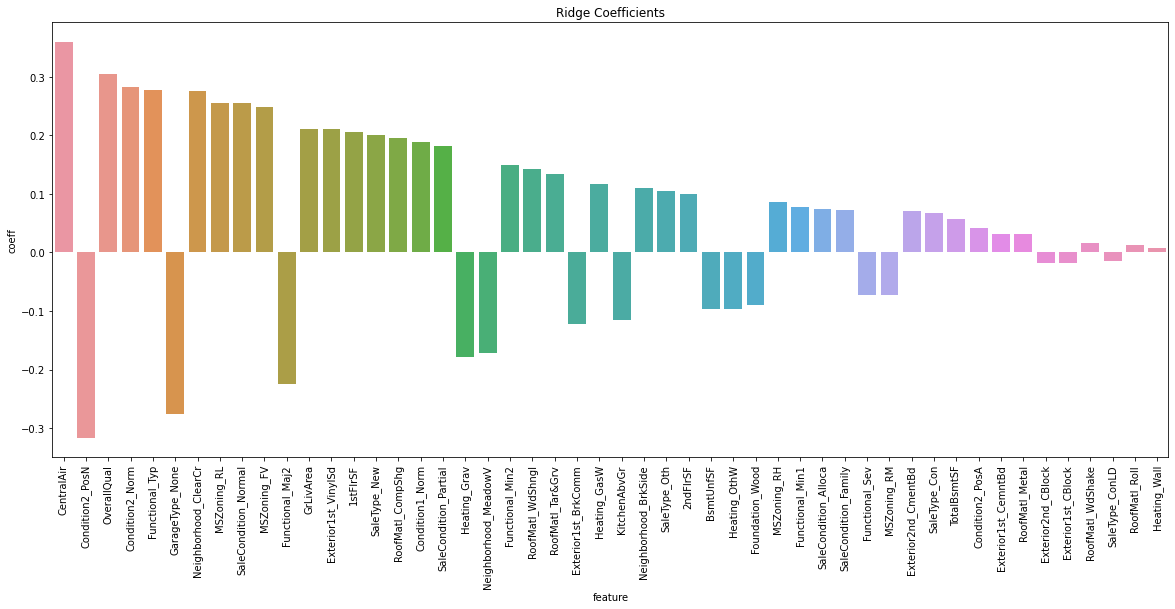

In [119]:
#feature ordering based on absolute value
ft_order = ridge_coeff.reindex(ridge_coeff.coeff.abs().sort_values(ascending=False).index).feature.values
#removing intercept values
ft_order = np.delete(ft_order, 0)
plt.figure(figsize=(20,8))
sns.barplot(x='feature', y='coeff', data=ridge_coeff, order = ft_order)
plt.xticks(rotation=90)
plt.title('Ridge Coefficients')
plt.show()

#### Lasso Regression Model

In [106]:
#Configuring KFold with 5 folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

#range of hyperparameters
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0, 100.0]}
#Lasso model
model = Lasso()

#grid search CV
model_l_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True)            
model_l_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0,
                                   20.0, 30.0, 40.0, 50.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=0)

In [107]:
cv_results = pd.DataFrame(model_l_cv.cv_results_, columns = ['param_alpha', 'mean_train_score', 'mean_test_score'])
cv_results.head()

,param_alpha,mean_train_score,mean_test_score
0,0.001,-0.246118,-0.273122
1,0.01,-0.283680,-0.294888
2,0.05,-0.344940,-0.350496
3,0.1,-0.368529,-0.373226
4,0.5,-0.520467,-0.521441


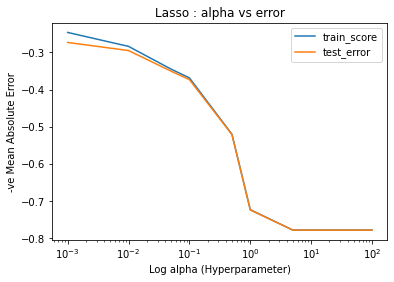

In [108]:
# Hyperparameter vs scoring values
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Log alpha (Hyperparameter)')
plt.ylabel('-ve Mean Absolute Error')
plt.legend(['train_score', 'test_error'], loc='upper right')
plt.xscale('log')
plt.title("Lasso : alpha vs error")
plt.show()

The graph is very steep and both validation and train scores are overlapping after 0.01. The optimal hyperparameter could be alpha = 0.001, because the nMAE value is high for both train and validation scores.

In [109]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print("Train R2 score : ",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print("Test R2 score : ",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Train R2 score :  0.8665818582249984
Test R2 score :  0.8366525127175536


We can say model is performing similar on both training and test data. R square value for test is 0.83 which is saying the model is doing pretty good.

In [110]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(p, 3) for p in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "intercept")
lasso_coeff = pd.DataFrame(zip(cols, model_parameters))
lasso_coeff.rename({0:'feature', 1:'coeff'}, axis=1, inplace=True)
#Extractingfeatures that have coeff values not equal to 0
lasso_coeff = lasso_coeff[lasso_coeff.coeff != 0]
lasso_coeff.head()

,feature,coeff
0,intercept,-4.047
1,OverallQual,0.292
2,BsmtUnfSF,-0.099
3,TotalBsmtSF,0.056
4,CentralAir,0.384


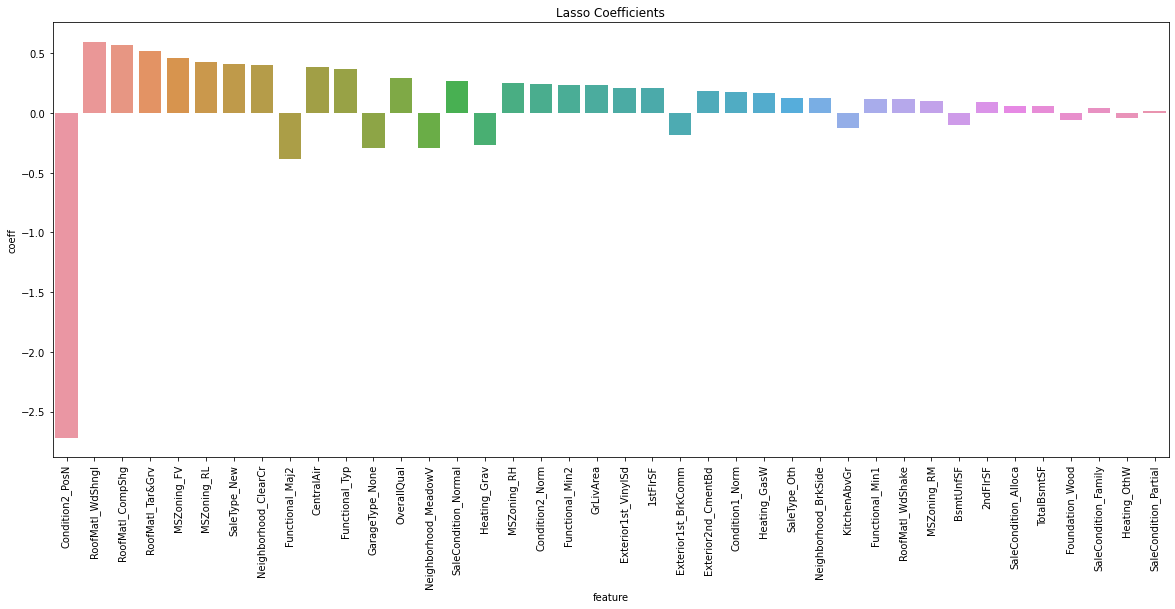

In [111]:
#feature ordering based on absolute value
ft_order = lasso_coeff.reindex(lasso_coeff.coeff.abs().sort_values(ascending=False).index).feature.values
#removing intercept values
ft_order = np.delete(ft_order, 0)

plt.figure(figsize=(20,8))
sns.barplot(x='feature', y='coeff', data=lasso_coeff[lasso_coeff.feature != 'intercept'], order = ft_order)
plt.xticks(rotation=90)
plt.title('Lasso Coefficients')
plt.show()

In [112]:
print("# Features for Ridge : ", ridge_coeff.feature.count())
print("# Features for Lasso : ", lasso_coeff.feature.count())

# Features for Ridge :  51
# Features for Lasso :  41


The R2 value for Ridge(0.85) is higher than R2 score of Lasso Regression(0.83), but the number features are very much reduced in lasso. We can say lasso is simpler than ridge, yet with good R2 value. 

The features and the coeff of Lasso regression are as follows

In [113]:
#sorting values based on absolute coeff value
lasso_coeff.reindex(lasso_coeff.coeff.abs().sort_values(ascending=False).index)

,feature,coeff
0,intercept,-4.047
19,Condition2_PosN,-2.718
25,RoofMatl_WdShngl,0.594
20,RoofMatl_CompShg,0.574
23,RoofMatl_Tar&Grv,0.521
9,MSZoning_FV,0.462
11,MSZoning_RL,0.430
45,SaleType_New,0.415
14,Neighborhood_ClearCr,0.404
37,Functional_Maj2,-0.388


In [114]:
#The top 10 features that are affecting the house price
lasso_coeff.reindex(lasso_coeff.coeff.abs().sort_values(ascending=False).index).head(11)

,feature,coeff
0,intercept,-4.047
19,Condition2_PosN,-2.718
25,RoofMatl_WdShngl,0.594
20,RoofMatl_CompShg,0.574
23,RoofMatl_Tar&Grv,0.521
9,MSZoning_FV,0.462
11,MSZoning_RL,0.430
45,SaleType_New,0.415
14,Neighborhood_ClearCr,0.404
37,Functional_Maj2,-0.388


Condition of house, Rootmaterial and Zone of house are very important features for price value. Other important features to consider are Saletype new (newly constructed houses), negihborhood, functinal and central Air conditioning.